# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

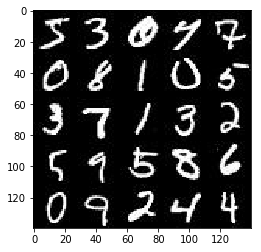

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

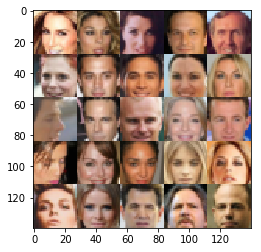

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Users\Jorge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name='input_real')
    inputs_z = tf.placeholder(tf.float32, [None, z_dim], name='input_z')
    lr = tf.placeholder(tf.float32, name='lr')

    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2*x1, x1)
        ## 14x14x32
        
        x2 = tf.layers.conv2d(relu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2*bn2,bn2)
        ## 7x7x64
        
        x3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2*bn3, bn3)
        #print(relu3.shape)
        
        flat = tf.reshape(relu3, (-1, 4*4*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    ## no reuse parameter, then Not is_train
    with tf.variable_scope('generator', reuse=not is_train):
        
        #first fully connected
        x1 = tf.layers.dense(z, 2*2*128)
        
        x1 = tf.reshape(x1, (-1, 2, 2, 128))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2*x1,x1)
        
        ##print(x1.shape)
        
        #same padding  4x4
        #valid padding 7x7
        x2 = tf.layers.conv2d_transpose(x1, 64,5,strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2*x2, x2)
        ##print(x2.shape)
        
        x3 = tf.layers.conv2d_transpose(x2, 32, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2*x3, x3)
        ##print(x3.shape)
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same')
        
        out = tf.tanh(logits)
        ##print(out.shape)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_real,
                                                                           labels = tf.ones_like(d_model_real)
                                                                         )
                                )
    d_loss_fake = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits= d_logits_fake,
                                                                           labels = tf.zeros_like(d_model_fake)
                                                                         )
                                )
    g_loss = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits = d_logits_fake,
                                                                      labels= tf.ones_like(d_model_fake)
                                                                    )
                           )
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    ##saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))
    
    samples, losses = [], []
    steps = 0
    
    print_every = 10
    show_every = 100
    
    ##-----Model Inputs-----##
    inputs_real, inputs_z, lrt = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    ##-----Model Loss-------##
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    ##-----Model Opt--------##
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                ##rescale
                batch_images = (batch_images*2)-1
                
                #noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                #optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real:batch_images ,inputs_z: batch_z, lrt:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z:batch_z, inputs_real:batch_images, lrt:learning_rate})
                
                if steps%print_every == 0:
                    train_loss_d = d_loss.eval({inputs_z:batch_z, inputs_real:batch_images})
                    train_loss_g = g_loss.eval({inputs_z:batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                    
                if steps%show_every == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)
                    
                    '''
            saver.save(sess, './checkpoints/generator.ckpt')
        with open('samples.pkl', 'wb') as f:
            pkl.dump(samples, f)        
                    '''
                    
            
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/3... Discriminator Loss: 0.1699... Generator Loss: 2.1977
Epoch 1/3... Discriminator Loss: 0.1031... Generator Loss: 2.7081
Epoch 1/3... Discriminator Loss: 0.0552... Generator Loss: 3.5095
Epoch 1/3... Discriminator Loss: 0.0389... Generator Loss: 3.6343
Epoch 1/3... Discriminator Loss: 0.0491... Generator Loss: 3.5600
Epoch 1/3... Discriminator Loss: 0.0364... Generator Loss: 3.8296
Epoch 1/3... Discriminator Loss: 0.0276... Generator Loss: 4.0501
Epoch 1/3... Discriminator Loss: 0.0244... Generator Loss: 4.0972
Epoch 1/3... Discriminator Loss: 0.0313... Generator Loss: 4.2468
Epoch 1/3... Discriminator Loss: 0.0252... Generator Loss: 4.2536


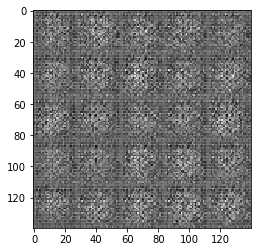

Epoch 1/3... Discriminator Loss: 0.0270... Generator Loss: 4.2968
Epoch 1/3... Discriminator Loss: 0.0200... Generator Loss: 4.6224
Epoch 1/3... Discriminator Loss: 0.0251... Generator Loss: 4.1111
Epoch 1/3... Discriminator Loss: 0.0360... Generator Loss: 3.7881
Epoch 1/3... Discriminator Loss: 0.0563... Generator Loss: 3.7739
Epoch 1/3... Discriminator Loss: 0.0518... Generator Loss: 3.9323
Epoch 1/3... Discriminator Loss: 0.0652... Generator Loss: 3.3460
Epoch 1/3... Discriminator Loss: 0.1469... Generator Loss: 3.5861
Epoch 1/3... Discriminator Loss: 0.3463... Generator Loss: 1.6786
Epoch 1/3... Discriminator Loss: 0.5580... Generator Loss: 1.0380


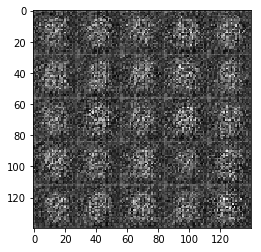

Epoch 1/3... Discriminator Loss: 0.4978... Generator Loss: 1.2034
Epoch 1/3... Discriminator Loss: 0.3612... Generator Loss: 1.5303
Epoch 1/3... Discriminator Loss: 0.1550... Generator Loss: 3.1037
Epoch 1/3... Discriminator Loss: 0.1255... Generator Loss: 2.5602
Epoch 1/3... Discriminator Loss: 0.1540... Generator Loss: 2.4125
Epoch 1/3... Discriminator Loss: 0.1695... Generator Loss: 4.5233
Epoch 1/3... Discriminator Loss: 0.0749... Generator Loss: 3.3072
Epoch 1/3... Discriminator Loss: 0.1008... Generator Loss: 3.0918
Epoch 1/3... Discriminator Loss: 0.0661... Generator Loss: 3.5069
Epoch 1/3... Discriminator Loss: 0.0446... Generator Loss: 4.2742


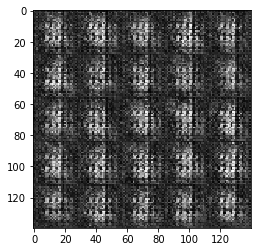

Epoch 1/3... Discriminator Loss: 0.0782... Generator Loss: 3.3009
Epoch 1/3... Discriminator Loss: 0.0516... Generator Loss: 3.9619
Epoch 1/3... Discriminator Loss: 0.0640... Generator Loss: 3.8741
Epoch 1/3... Discriminator Loss: 0.0257... Generator Loss: 4.6036
Epoch 1/3... Discriminator Loss: 0.0406... Generator Loss: 4.3617
Epoch 1/3... Discriminator Loss: 0.0415... Generator Loss: 4.0001
Epoch 1/3... Discriminator Loss: 0.0508... Generator Loss: 3.7997
Epoch 1/3... Discriminator Loss: 0.0250... Generator Loss: 4.9850
Epoch 1/3... Discriminator Loss: 0.0371... Generator Loss: 4.1973
Epoch 1/3... Discriminator Loss: 0.0331... Generator Loss: 4.1347


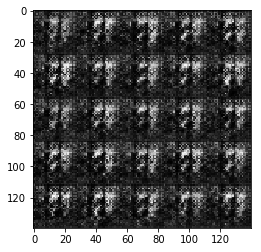

Epoch 1/3... Discriminator Loss: 0.0082... Generator Loss: 5.5239
Epoch 1/3... Discriminator Loss: 0.0223... Generator Loss: 4.5677
Epoch 1/3... Discriminator Loss: 0.0364... Generator Loss: 4.2135
Epoch 1/3... Discriminator Loss: 0.0290... Generator Loss: 4.7469
Epoch 1/3... Discriminator Loss: 0.0410... Generator Loss: 4.1512
Epoch 1/3... Discriminator Loss: 0.0376... Generator Loss: 3.9362
Epoch 1/3... Discriminator Loss: 0.0268... Generator Loss: 4.5728
Epoch 1/3... Discriminator Loss: 0.0376... Generator Loss: 3.8460
Epoch 1/3... Discriminator Loss: 0.0575... Generator Loss: 4.0334
Epoch 1/3... Discriminator Loss: 0.0417... Generator Loss: 4.7815


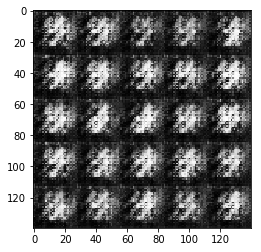

Epoch 1/3... Discriminator Loss: 0.0365... Generator Loss: 5.4229
Epoch 1/3... Discriminator Loss: 0.0183... Generator Loss: 5.4436
Epoch 1/3... Discriminator Loss: 0.0174... Generator Loss: 4.7923
Epoch 1/3... Discriminator Loss: 0.0385... Generator Loss: 4.7172
Epoch 1/3... Discriminator Loss: 0.0405... Generator Loss: 3.7661
Epoch 1/3... Discriminator Loss: 0.0554... Generator Loss: 3.5134
Epoch 1/3... Discriminator Loss: 0.0455... Generator Loss: 4.2189
Epoch 1/3... Discriminator Loss: 3.1328... Generator Loss: 14.1120
Epoch 1/3... Discriminator Loss: 0.0330... Generator Loss: 5.1913
Epoch 1/3... Discriminator Loss: 0.1951... Generator Loss: 2.7321


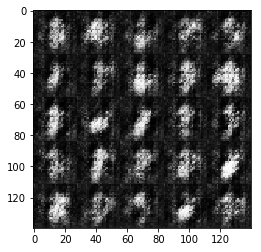

Epoch 1/3... Discriminator Loss: 0.1011... Generator Loss: 4.3207
Epoch 1/3... Discriminator Loss: 0.0597... Generator Loss: 3.9847
Epoch 1/3... Discriminator Loss: 0.0667... Generator Loss: 3.9342
Epoch 1/3... Discriminator Loss: 0.0685... Generator Loss: 3.2196
Epoch 1/3... Discriminator Loss: 0.0395... Generator Loss: 4.2721
Epoch 1/3... Discriminator Loss: 0.0388... Generator Loss: 4.0978
Epoch 1/3... Discriminator Loss: 0.0405... Generator Loss: 3.8703
Epoch 1/3... Discriminator Loss: 0.0404... Generator Loss: 5.0294
Epoch 1/3... Discriminator Loss: 0.0417... Generator Loss: 4.0150
Epoch 1/3... Discriminator Loss: 0.0651... Generator Loss: 4.1804


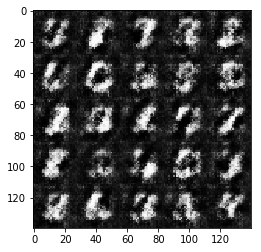

Epoch 1/3... Discriminator Loss: 0.0884... Generator Loss: 4.9709
Epoch 1/3... Discriminator Loss: 0.1935... Generator Loss: 2.2567
Epoch 1/3... Discriminator Loss: 0.0657... Generator Loss: 3.3404
Epoch 1/3... Discriminator Loss: 0.0405... Generator Loss: 4.9442
Epoch 1/3... Discriminator Loss: 0.4647... Generator Loss: 1.3319
Epoch 1/3... Discriminator Loss: 0.0453... Generator Loss: 3.6834
Epoch 1/3... Discriminator Loss: 0.0793... Generator Loss: 3.0914
Epoch 1/3... Discriminator Loss: 0.3090... Generator Loss: 10.6363
Epoch 1/3... Discriminator Loss: 0.0555... Generator Loss: 4.1049
Epoch 1/3... Discriminator Loss: 0.1529... Generator Loss: 2.4035


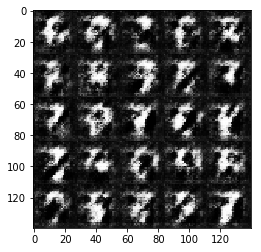

Epoch 1/3... Discriminator Loss: 0.1170... Generator Loss: 2.9469
Epoch 1/3... Discriminator Loss: 0.0841... Generator Loss: 4.2608
Epoch 1/3... Discriminator Loss: 0.0539... Generator Loss: 4.1903
Epoch 1/3... Discriminator Loss: 0.0388... Generator Loss: 4.6017
Epoch 1/3... Discriminator Loss: 0.0540... Generator Loss: 4.0291
Epoch 1/3... Discriminator Loss: 0.0274... Generator Loss: 5.3428
Epoch 1/3... Discriminator Loss: 0.7810... Generator Loss: 1.0049
Epoch 1/3... Discriminator Loss: 0.1610... Generator Loss: 2.6076
Epoch 1/3... Discriminator Loss: 0.3120... Generator Loss: 4.3592
Epoch 1/3... Discriminator Loss: 0.0861... Generator Loss: 4.1134


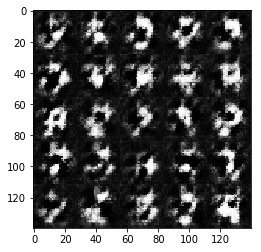

Epoch 1/3... Discriminator Loss: 0.1556... Generator Loss: 3.0367
Epoch 1/3... Discriminator Loss: 0.1352... Generator Loss: 2.6538
Epoch 1/3... Discriminator Loss: 0.1097... Generator Loss: 3.3131
Epoch 1/3... Discriminator Loss: 0.0790... Generator Loss: 3.6023
Epoch 1/3... Discriminator Loss: 0.0823... Generator Loss: 4.9255
Epoch 1/3... Discriminator Loss: 0.1200... Generator Loss: 2.9119
Epoch 1/3... Discriminator Loss: 0.0626... Generator Loss: 4.3081
Epoch 1/3... Discriminator Loss: 0.1563... Generator Loss: 3.2400
Epoch 1/3... Discriminator Loss: 0.0915... Generator Loss: 3.8530
Epoch 1/3... Discriminator Loss: 0.0766... Generator Loss: 3.7752


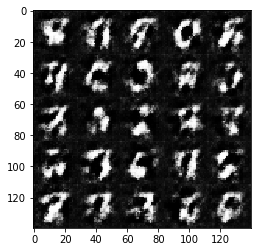

Epoch 1/3... Discriminator Loss: 0.0837... Generator Loss: 3.8288
Epoch 1/3... Discriminator Loss: 0.1151... Generator Loss: 3.0918
Epoch 1/3... Discriminator Loss: 0.0455... Generator Loss: 4.0413
Epoch 1/3... Discriminator Loss: 0.1100... Generator Loss: 3.0914
Epoch 1/3... Discriminator Loss: 0.0761... Generator Loss: 3.8102
Epoch 1/3... Discriminator Loss: 0.1238... Generator Loss: 2.9114
Epoch 1/3... Discriminator Loss: 0.2252... Generator Loss: 2.2138
Epoch 1/3... Discriminator Loss: 0.0615... Generator Loss: 3.3187
Epoch 1/3... Discriminator Loss: 0.1170... Generator Loss: 3.0767
Epoch 1/3... Discriminator Loss: 0.1501... Generator Loss: 3.8476


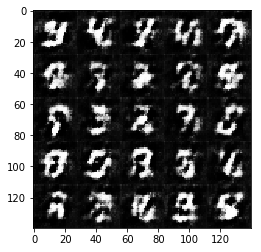

Epoch 1/3... Discriminator Loss: 0.1228... Generator Loss: 2.7512
Epoch 1/3... Discriminator Loss: 0.3469... Generator Loss: 1.9041
Epoch 1/3... Discriminator Loss: 0.1324... Generator Loss: 3.4808
Epoch 1/3... Discriminator Loss: 0.0914... Generator Loss: 3.2303
Epoch 1/3... Discriminator Loss: 0.1983... Generator Loss: 4.4514
Epoch 1/3... Discriminator Loss: 0.1173... Generator Loss: 3.0208
Epoch 1/3... Discriminator Loss: 0.1235... Generator Loss: 3.2366
Epoch 1/3... Discriminator Loss: 0.1300... Generator Loss: 2.9051
Epoch 1/3... Discriminator Loss: 0.1480... Generator Loss: 2.8564
Epoch 1/3... Discriminator Loss: 0.4789... Generator Loss: 6.0014


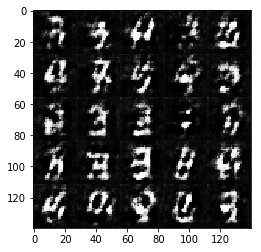

Epoch 1/3... Discriminator Loss: 0.0628... Generator Loss: 4.2061
Epoch 1/3... Discriminator Loss: 0.1335... Generator Loss: 2.7223
Epoch 1/3... Discriminator Loss: 0.0647... Generator Loss: 3.7684
Epoch 1/3... Discriminator Loss: 0.2064... Generator Loss: 5.5982
Epoch 1/3... Discriminator Loss: 0.3641... Generator Loss: 1.8835
Epoch 1/3... Discriminator Loss: 0.3218... Generator Loss: 1.7059
Epoch 1/3... Discriminator Loss: 0.2462... Generator Loss: 2.1825
Epoch 1/3... Discriminator Loss: 0.1431... Generator Loss: 3.3989
Epoch 1/3... Discriminator Loss: 0.2464... Generator Loss: 2.5272
Epoch 1/3... Discriminator Loss: 0.4334... Generator Loss: 1.4821


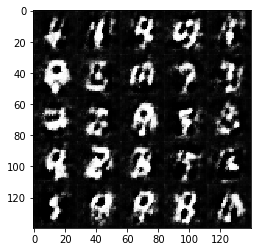

Epoch 1/3... Discriminator Loss: 0.0784... Generator Loss: 4.8174
Epoch 1/3... Discriminator Loss: 0.2322... Generator Loss: 2.5161
Epoch 1/3... Discriminator Loss: 0.2444... Generator Loss: 2.1304
Epoch 1/3... Discriminator Loss: 0.6853... Generator Loss: 0.9066
Epoch 1/3... Discriminator Loss: 0.2977... Generator Loss: 2.0167
Epoch 1/3... Discriminator Loss: 0.4154... Generator Loss: 1.7872
Epoch 1/3... Discriminator Loss: 0.1782... Generator Loss: 3.2393
Epoch 1/3... Discriminator Loss: 0.1511... Generator Loss: 2.4829
Epoch 1/3... Discriminator Loss: 0.2085... Generator Loss: 2.8516
Epoch 1/3... Discriminator Loss: 0.1351... Generator Loss: 3.4758


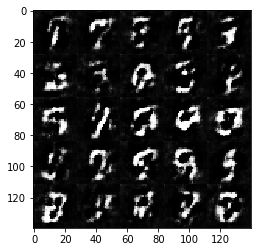

Epoch 1/3... Discriminator Loss: 0.1455... Generator Loss: 3.5688
Epoch 1/3... Discriminator Loss: 0.4682... Generator Loss: 1.5683
Epoch 1/3... Discriminator Loss: 0.1935... Generator Loss: 2.0726
Epoch 1/3... Discriminator Loss: 0.1585... Generator Loss: 3.2024
Epoch 1/3... Discriminator Loss: 0.2000... Generator Loss: 2.7957
Epoch 1/3... Discriminator Loss: 0.1239... Generator Loss: 4.0309
Epoch 1/3... Discriminator Loss: 0.2887... Generator Loss: 1.7702
Epoch 1/3... Discriminator Loss: 0.2463... Generator Loss: 2.1783
Epoch 1/3... Discriminator Loss: 0.5251... Generator Loss: 1.3889
Epoch 1/3... Discriminator Loss: 0.1797... Generator Loss: 2.3329


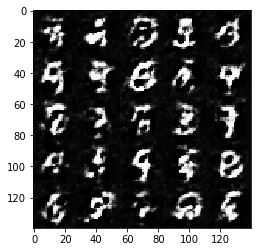

Epoch 1/3... Discriminator Loss: 0.3827... Generator Loss: 1.7511
Epoch 1/3... Discriminator Loss: 0.1223... Generator Loss: 4.1728
Epoch 1/3... Discriminator Loss: 0.9187... Generator Loss: 0.8215
Epoch 1/3... Discriminator Loss: 0.1985... Generator Loss: 2.2356
Epoch 1/3... Discriminator Loss: 0.9351... Generator Loss: 0.7144
Epoch 1/3... Discriminator Loss: 0.2315... Generator Loss: 3.0097
Epoch 1/3... Discriminator Loss: 0.1325... Generator Loss: 2.9363
Epoch 1/3... Discriminator Loss: 0.1364... Generator Loss: 3.3930
Epoch 1/3... Discriminator Loss: 0.1136... Generator Loss: 3.6172
Epoch 1/3... Discriminator Loss: 0.3013... Generator Loss: 1.8640


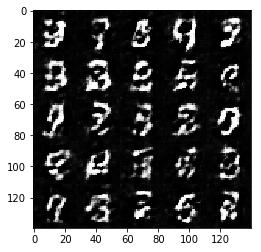

Epoch 1/3... Discriminator Loss: 0.3906... Generator Loss: 1.6810
Epoch 1/3... Discriminator Loss: 0.1437... Generator Loss: 3.0657
Epoch 1/3... Discriminator Loss: 0.1247... Generator Loss: 3.6263
Epoch 1/3... Discriminator Loss: 0.1686... Generator Loss: 3.1684
Epoch 1/3... Discriminator Loss: 0.3709... Generator Loss: 1.9028
Epoch 1/3... Discriminator Loss: 0.2418... Generator Loss: 2.6539
Epoch 1/3... Discriminator Loss: 0.1871... Generator Loss: 2.4352
Epoch 1/3... Discriminator Loss: 0.3593... Generator Loss: 1.9257
Epoch 1/3... Discriminator Loss: 0.1742... Generator Loss: 3.0913
Epoch 1/3... Discriminator Loss: 0.2608... Generator Loss: 3.6715


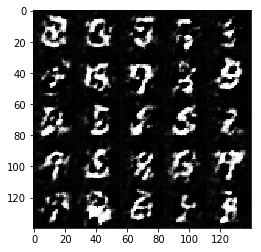

Epoch 1/3... Discriminator Loss: 0.1007... Generator Loss: 3.0241
Epoch 1/3... Discriminator Loss: 0.5965... Generator Loss: 1.0845
Epoch 1/3... Discriminator Loss: 0.1955... Generator Loss: 2.5914
Epoch 1/3... Discriminator Loss: 0.5446... Generator Loss: 1.4690
Epoch 1/3... Discriminator Loss: 0.2164... Generator Loss: 2.9558
Epoch 1/3... Discriminator Loss: 0.1732... Generator Loss: 2.8336
Epoch 1/3... Discriminator Loss: 0.1598... Generator Loss: 3.1889
Epoch 1/3... Discriminator Loss: 0.2715... Generator Loss: 2.1885
Epoch 1/3... Discriminator Loss: 0.1650... Generator Loss: 3.1586
Epoch 1/3... Discriminator Loss: 0.1612... Generator Loss: 2.6716


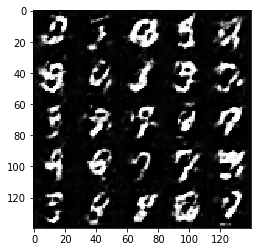

Epoch 1/3... Discriminator Loss: 0.1825... Generator Loss: 2.7372
Epoch 1/3... Discriminator Loss: 0.2016... Generator Loss: 2.3936
Epoch 1/3... Discriminator Loss: 0.4853... Generator Loss: 1.3932
Epoch 1/3... Discriminator Loss: 0.3659... Generator Loss: 1.4932
Epoch 1/3... Discriminator Loss: 2.1325... Generator Loss: 0.1894
Epoch 1/3... Discriminator Loss: 0.2331... Generator Loss: 3.2863
Epoch 1/3... Discriminator Loss: 0.2406... Generator Loss: 2.5185
Epoch 1/3... Discriminator Loss: 0.2209... Generator Loss: 3.1413
Epoch 1/3... Discriminator Loss: 0.1729... Generator Loss: 3.3987
Epoch 1/3... Discriminator Loss: 0.2348... Generator Loss: 3.0092


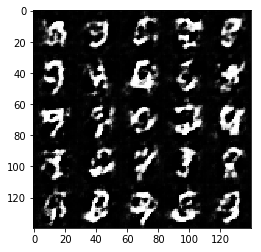

Epoch 1/3... Discriminator Loss: 0.1838... Generator Loss: 3.6003
Epoch 1/3... Discriminator Loss: 0.1636... Generator Loss: 3.1997
Epoch 1/3... Discriminator Loss: 0.1490... Generator Loss: 4.3893
Epoch 1/3... Discriminator Loss: 0.1700... Generator Loss: 2.5488
Epoch 1/3... Discriminator Loss: 0.2711... Generator Loss: 1.8633
Epoch 1/3... Discriminator Loss: 0.1127... Generator Loss: 3.6805
Epoch 1/3... Discriminator Loss: 0.1673... Generator Loss: 3.1017
Epoch 1/3... Discriminator Loss: 0.1141... Generator Loss: 3.3642
Epoch 1/3... Discriminator Loss: 0.1481... Generator Loss: 3.3030
Epoch 1/3... Discriminator Loss: 0.3752... Generator Loss: 4.2381


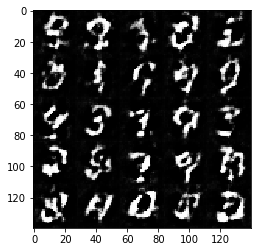

Epoch 1/3... Discriminator Loss: 0.1296... Generator Loss: 3.2603
Epoch 1/3... Discriminator Loss: 0.2020... Generator Loss: 2.2984
Epoch 1/3... Discriminator Loss: 0.1928... Generator Loss: 3.6905
Epoch 1/3... Discriminator Loss: 0.1903... Generator Loss: 2.9638
Epoch 1/3... Discriminator Loss: 0.2190... Generator Loss: 3.5957
Epoch 1/3... Discriminator Loss: 0.1974... Generator Loss: 2.4457
Epoch 1/3... Discriminator Loss: 0.1131... Generator Loss: 3.3989
Epoch 1/3... Discriminator Loss: 0.1534... Generator Loss: 2.9549
Epoch 1/3... Discriminator Loss: 0.1996... Generator Loss: 3.2969
Epoch 1/3... Discriminator Loss: 0.0840... Generator Loss: 3.5163


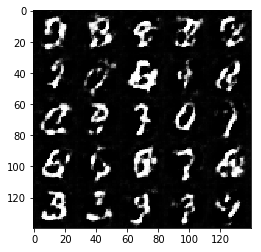

Epoch 1/3... Discriminator Loss: 0.1691... Generator Loss: 3.9113
Epoch 1/3... Discriminator Loss: 0.1510... Generator Loss: 2.9002
Epoch 1/3... Discriminator Loss: 0.2538... Generator Loss: 2.0867
Epoch 1/3... Discriminator Loss: 0.2306... Generator Loss: 2.1675
Epoch 1/3... Discriminator Loss: 0.1155... Generator Loss: 2.9771
Epoch 1/3... Discriminator Loss: 0.0588... Generator Loss: 4.2163
Epoch 1/3... Discriminator Loss: 0.5654... Generator Loss: 5.9428
Epoch 1/3... Discriminator Loss: 0.2154... Generator Loss: 2.8023
Epoch 1/3... Discriminator Loss: 0.1825... Generator Loss: 2.7479
Epoch 1/3... Discriminator Loss: 0.3276... Generator Loss: 1.9132


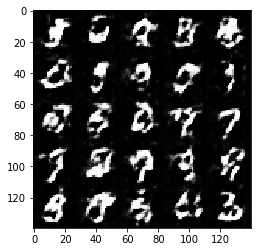

Epoch 1/3... Discriminator Loss: 0.1817... Generator Loss: 2.7184
Epoch 1/3... Discriminator Loss: 0.1570... Generator Loss: 2.4758
Epoch 1/3... Discriminator Loss: 0.4380... Generator Loss: 3.0281
Epoch 1/3... Discriminator Loss: 0.1863... Generator Loss: 2.3792
Epoch 1/3... Discriminator Loss: 0.0965... Generator Loss: 4.0925
Epoch 1/3... Discriminator Loss: 0.1227... Generator Loss: 2.6551
Epoch 1/3... Discriminator Loss: 0.2259... Generator Loss: 2.9588
Epoch 1/3... Discriminator Loss: 0.2433... Generator Loss: 2.5822
Epoch 1/3... Discriminator Loss: 0.2004... Generator Loss: 2.2266
Epoch 1/3... Discriminator Loss: 0.1694... Generator Loss: 2.9647


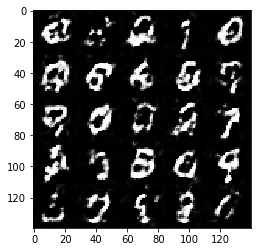

Epoch 1/3... Discriminator Loss: 0.2598... Generator Loss: 2.4265
Epoch 1/3... Discriminator Loss: 0.2201... Generator Loss: 2.7044
Epoch 1/3... Discriminator Loss: 0.1683... Generator Loss: 2.4608
Epoch 1/3... Discriminator Loss: 0.1843... Generator Loss: 3.2402
Epoch 1/3... Discriminator Loss: 0.0990... Generator Loss: 3.4071
Epoch 1/3... Discriminator Loss: 0.1787... Generator Loss: 2.6091
Epoch 1/3... Discriminator Loss: 0.1490... Generator Loss: 2.7640
Epoch 1/3... Discriminator Loss: 0.0797... Generator Loss: 4.9604
Epoch 1/3... Discriminator Loss: 0.1316... Generator Loss: 2.9618
Epoch 1/3... Discriminator Loss: 0.0806... Generator Loss: 3.5037


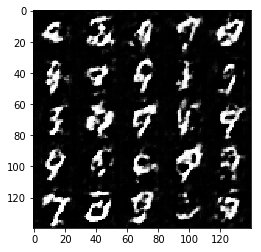

Epoch 1/3... Discriminator Loss: 0.1860... Generator Loss: 3.2115
Epoch 1/3... Discriminator Loss: 0.2288... Generator Loss: 4.3542
Epoch 1/3... Discriminator Loss: 0.6539... Generator Loss: 3.9121
Epoch 1/3... Discriminator Loss: 0.4134... Generator Loss: 3.9655
Epoch 1/3... Discriminator Loss: 0.1595... Generator Loss: 3.4600
Epoch 1/3... Discriminator Loss: 0.2578... Generator Loss: 2.6813
Epoch 1/3... Discriminator Loss: 0.1037... Generator Loss: 4.3226
Epoch 1/3... Discriminator Loss: 0.2948... Generator Loss: 2.0061
Epoch 1/3... Discriminator Loss: 0.2537... Generator Loss: 1.7733
Epoch 1/3... Discriminator Loss: 0.1384... Generator Loss: 3.2752


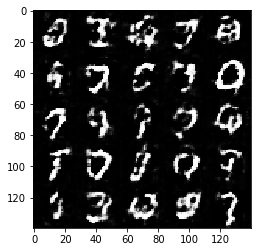

Epoch 1/3... Discriminator Loss: 0.2297... Generator Loss: 2.3697
Epoch 1/3... Discriminator Loss: 0.1607... Generator Loss: 3.1874
Epoch 1/3... Discriminator Loss: 0.1902... Generator Loss: 2.4647
Epoch 1/3... Discriminator Loss: 0.1944... Generator Loss: 2.0449
Epoch 1/3... Discriminator Loss: 0.1816... Generator Loss: 2.7389
Epoch 1/3... Discriminator Loss: 0.2013... Generator Loss: 2.7194
Epoch 1/3... Discriminator Loss: 0.1923... Generator Loss: 2.7594
Epoch 1/3... Discriminator Loss: 0.2671... Generator Loss: 2.7056
Epoch 1/3... Discriminator Loss: 0.2131... Generator Loss: 2.6527
Epoch 1/3... Discriminator Loss: 0.3060... Generator Loss: 2.5628


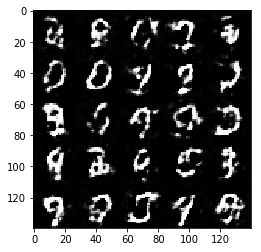

Epoch 1/3... Discriminator Loss: 0.1144... Generator Loss: 3.3048
Epoch 1/3... Discriminator Loss: 0.0950... Generator Loss: 3.6797
Epoch 1/3... Discriminator Loss: 0.2376... Generator Loss: 2.5225
Epoch 1/3... Discriminator Loss: 1.2494... Generator Loss: 0.4914
Epoch 1/3... Discriminator Loss: 0.1835... Generator Loss: 2.8582
Epoch 1/3... Discriminator Loss: 1.1679... Generator Loss: 0.5198
Epoch 1/3... Discriminator Loss: 0.2214... Generator Loss: 3.5346
Epoch 1/3... Discriminator Loss: 0.3058... Generator Loss: 3.4968
Epoch 1/3... Discriminator Loss: 0.1580... Generator Loss: 2.3592
Epoch 1/3... Discriminator Loss: 0.3193... Generator Loss: 3.5759


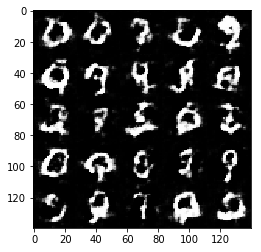

Epoch 1/3... Discriminator Loss: 0.3061... Generator Loss: 2.6633
Epoch 1/3... Discriminator Loss: 0.5125... Generator Loss: 2.4928
Epoch 1/3... Discriminator Loss: 0.2309... Generator Loss: 2.3620
Epoch 1/3... Discriminator Loss: 0.1805... Generator Loss: 2.2176
Epoch 1/3... Discriminator Loss: 0.1735... Generator Loss: 2.3147
Epoch 1/3... Discriminator Loss: 0.3678... Generator Loss: 3.2072
Epoch 1/3... Discriminator Loss: 0.2443... Generator Loss: 2.2677
Epoch 1/3... Discriminator Loss: 0.2027... Generator Loss: 3.2264
Epoch 1/3... Discriminator Loss: 0.1710... Generator Loss: 2.5871
Epoch 1/3... Discriminator Loss: 0.2111... Generator Loss: 2.7613


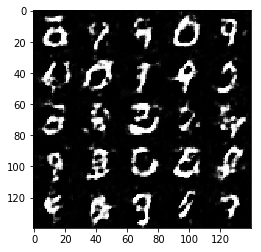

Epoch 1/3... Discriminator Loss: 0.2404... Generator Loss: 3.6513
Epoch 1/3... Discriminator Loss: 0.2038... Generator Loss: 2.8969
Epoch 1/3... Discriminator Loss: 0.4504... Generator Loss: 1.3436
Epoch 1/3... Discriminator Loss: 0.3215... Generator Loss: 2.0691
Epoch 1/3... Discriminator Loss: 0.3376... Generator Loss: 1.8664
Epoch 1/3... Discriminator Loss: 0.1486... Generator Loss: 2.5157
Epoch 1/3... Discriminator Loss: 0.1955... Generator Loss: 2.3310
Epoch 1/3... Discriminator Loss: 0.1795... Generator Loss: 2.4705
Epoch 1/3... Discriminator Loss: 0.2187... Generator Loss: 3.0444
Epoch 1/3... Discriminator Loss: 0.2354... Generator Loss: 2.5769


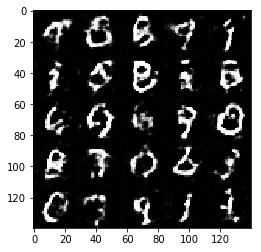

Epoch 1/3... Discriminator Loss: 0.2395... Generator Loss: 2.2653
Epoch 1/3... Discriminator Loss: 0.3739... Generator Loss: 3.5474
Epoch 1/3... Discriminator Loss: 0.1210... Generator Loss: 3.7428
Epoch 1/3... Discriminator Loss: 0.3098... Generator Loss: 1.7630
Epoch 1/3... Discriminator Loss: 0.6485... Generator Loss: 1.1589
Epoch 1/3... Discriminator Loss: 0.1981... Generator Loss: 2.4531
Epoch 1/3... Discriminator Loss: 0.0837... Generator Loss: 3.3635
Epoch 1/3... Discriminator Loss: 0.9343... Generator Loss: 0.6069
Epoch 1/3... Discriminator Loss: 0.1934... Generator Loss: 2.4203
Epoch 1/3... Discriminator Loss: 0.1749... Generator Loss: 2.6584


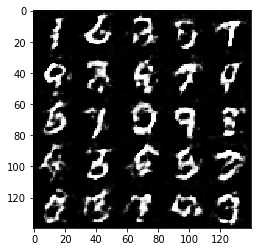

Epoch 1/3... Discriminator Loss: 0.1289... Generator Loss: 2.4842
Epoch 1/3... Discriminator Loss: 0.2994... Generator Loss: 2.8264
Epoch 1/3... Discriminator Loss: 0.2242... Generator Loss: 2.3744
Epoch 1/3... Discriminator Loss: 0.1118... Generator Loss: 3.0658
Epoch 1/3... Discriminator Loss: 0.3883... Generator Loss: 1.6959
Epoch 1/3... Discriminator Loss: 0.2578... Generator Loss: 1.8043
Epoch 1/3... Discriminator Loss: 0.2212... Generator Loss: 3.2995
Epoch 1/3... Discriminator Loss: 0.2541... Generator Loss: 2.1692
Epoch 1/3... Discriminator Loss: 1.1462... Generator Loss: 0.7526
Epoch 1/3... Discriminator Loss: 0.2697... Generator Loss: 2.3669


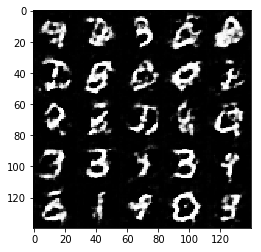

Epoch 1/3... Discriminator Loss: 0.4243... Generator Loss: 3.5968
Epoch 1/3... Discriminator Loss: 0.2634... Generator Loss: 2.1799
Epoch 1/3... Discriminator Loss: 0.2930... Generator Loss: 2.0257
Epoch 1/3... Discriminator Loss: 0.2965... Generator Loss: 1.9074
Epoch 1/3... Discriminator Loss: 0.4873... Generator Loss: 1.3633
Epoch 1/3... Discriminator Loss: 0.1400... Generator Loss: 2.2767
Epoch 1/3... Discriminator Loss: 0.2309... Generator Loss: 2.1958
Epoch 1/3... Discriminator Loss: 0.3711... Generator Loss: 1.7894
Epoch 1/3... Discriminator Loss: 0.1959... Generator Loss: 4.8404
Epoch 1/3... Discriminator Loss: 0.5286... Generator Loss: 1.4860


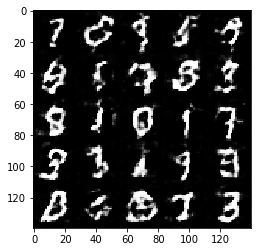

Epoch 1/3... Discriminator Loss: 0.5140... Generator Loss: 1.3357
Epoch 1/3... Discriminator Loss: 0.3073... Generator Loss: 2.6174
Epoch 1/3... Discriminator Loss: 0.1151... Generator Loss: 3.4492
Epoch 1/3... Discriminator Loss: 0.1792... Generator Loss: 2.6905
Epoch 1/3... Discriminator Loss: 0.1561... Generator Loss: 2.7137
Epoch 1/3... Discriminator Loss: 0.2503... Generator Loss: 2.3270
Epoch 1/3... Discriminator Loss: 0.4275... Generator Loss: 1.2386
Epoch 1/3... Discriminator Loss: 0.3712... Generator Loss: 1.6092
Epoch 1/3... Discriminator Loss: 0.3761... Generator Loss: 1.7014
Epoch 1/3... Discriminator Loss: 0.1206... Generator Loss: 3.3061


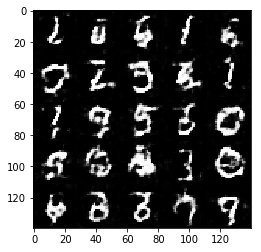

Epoch 1/3... Discriminator Loss: 0.1613... Generator Loss: 2.5223
Epoch 1/3... Discriminator Loss: 0.1027... Generator Loss: 3.0507
Epoch 1/3... Discriminator Loss: 0.1515... Generator Loss: 4.0618
Epoch 1/3... Discriminator Loss: 0.5361... Generator Loss: 1.2150
Epoch 1/3... Discriminator Loss: 0.1996... Generator Loss: 2.2403
Epoch 1/3... Discriminator Loss: 0.2907... Generator Loss: 2.5315
Epoch 1/3... Discriminator Loss: 0.2602... Generator Loss: 2.3914
Epoch 1/3... Discriminator Loss: 0.1210... Generator Loss: 2.6378
Epoch 1/3... Discriminator Loss: 0.6128... Generator Loss: 1.0205
Epoch 1/3... Discriminator Loss: 0.2717... Generator Loss: 1.9852


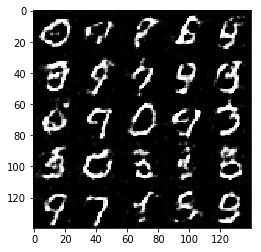

Epoch 1/3... Discriminator Loss: 0.2443... Generator Loss: 2.1272
Epoch 1/3... Discriminator Loss: 0.9543... Generator Loss: 4.1012
Epoch 1/3... Discriminator Loss: 0.3465... Generator Loss: 1.9374
Epoch 1/3... Discriminator Loss: 0.4108... Generator Loss: 1.7147
Epoch 1/3... Discriminator Loss: 0.2107... Generator Loss: 2.1831
Epoch 1/3... Discriminator Loss: 0.3418... Generator Loss: 1.7980
Epoch 1/3... Discriminator Loss: 0.1242... Generator Loss: 3.7389
Epoch 1/3... Discriminator Loss: 0.2716... Generator Loss: 2.5450
Epoch 1/3... Discriminator Loss: 0.4690... Generator Loss: 1.7042
Epoch 1/3... Discriminator Loss: 0.2802... Generator Loss: 3.0119


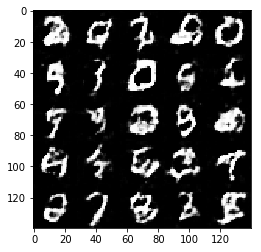

Epoch 1/3... Discriminator Loss: 0.2522... Generator Loss: 2.1101
Epoch 1/3... Discriminator Loss: 0.2122... Generator Loss: 2.1607
Epoch 1/3... Discriminator Loss: 0.3331... Generator Loss: 1.9742
Epoch 1/3... Discriminator Loss: 0.8694... Generator Loss: 0.9067
Epoch 1/3... Discriminator Loss: 0.2345... Generator Loss: 2.1784
Epoch 1/3... Discriminator Loss: 0.2322... Generator Loss: 2.5111
Epoch 1/3... Discriminator Loss: 0.1474... Generator Loss: 3.2462
Epoch 1/3... Discriminator Loss: 0.1989... Generator Loss: 3.1631
Epoch 1/3... Discriminator Loss: 0.4773... Generator Loss: 1.2306
Epoch 1/3... Discriminator Loss: 0.2595... Generator Loss: 2.6174


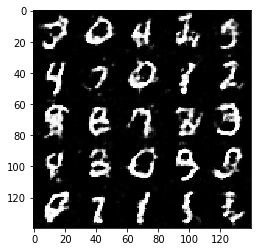

Epoch 1/3... Discriminator Loss: 0.8990... Generator Loss: 3.2192
Epoch 1/3... Discriminator Loss: 0.3781... Generator Loss: 1.9778
Epoch 1/3... Discriminator Loss: 1.3727... Generator Loss: 0.6724
Epoch 1/3... Discriminator Loss: 0.4144... Generator Loss: 1.9107
Epoch 1/3... Discriminator Loss: 0.4973... Generator Loss: 3.0255
Epoch 1/3... Discriminator Loss: 1.7173... Generator Loss: 0.3790
Epoch 1/3... Discriminator Loss: 0.2540... Generator Loss: 3.4867
Epoch 1/3... Discriminator Loss: 0.2993... Generator Loss: 2.3113
Epoch 1/3... Discriminator Loss: 0.6911... Generator Loss: 1.3434
Epoch 1/3... Discriminator Loss: 0.5970... Generator Loss: 1.0496


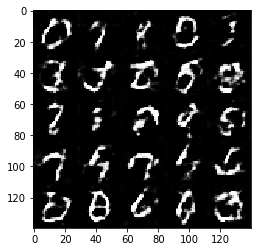

Epoch 1/3... Discriminator Loss: 0.0751... Generator Loss: 3.8335
Epoch 1/3... Discriminator Loss: 0.4263... Generator Loss: 1.8848
Epoch 1/3... Discriminator Loss: 0.2466... Generator Loss: 2.3432
Epoch 1/3... Discriminator Loss: 0.0973... Generator Loss: 3.0660
Epoch 1/3... Discriminator Loss: 0.1750... Generator Loss: 2.6983
Epoch 2/3... Discriminator Loss: 0.2852... Generator Loss: 3.4207
Epoch 2/3... Discriminator Loss: 0.2751... Generator Loss: 2.3205
Epoch 2/3... Discriminator Loss: 0.2962... Generator Loss: 3.3692
Epoch 2/3... Discriminator Loss: 0.2819... Generator Loss: 2.2546
Epoch 2/3... Discriminator Loss: 0.2673... Generator Loss: 2.3449


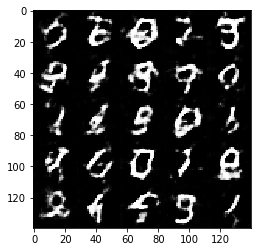

Epoch 2/3... Discriminator Loss: 0.8210... Generator Loss: 0.7401
Epoch 2/3... Discriminator Loss: 0.1581... Generator Loss: 2.7260
Epoch 2/3... Discriminator Loss: 0.2843... Generator Loss: 1.9850
Epoch 2/3... Discriminator Loss: 0.2059... Generator Loss: 2.2541
Epoch 2/3... Discriminator Loss: 0.3805... Generator Loss: 1.9271
Epoch 2/3... Discriminator Loss: 0.5081... Generator Loss: 3.4074
Epoch 2/3... Discriminator Loss: 0.3866... Generator Loss: 2.1973
Epoch 2/3... Discriminator Loss: 0.3258... Generator Loss: 3.8814
Epoch 2/3... Discriminator Loss: 0.5120... Generator Loss: 2.3884
Epoch 2/3... Discriminator Loss: 0.1329... Generator Loss: 2.7480


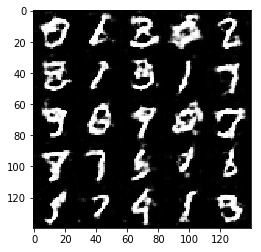

Epoch 2/3... Discriminator Loss: 0.3710... Generator Loss: 1.6060
Epoch 2/3... Discriminator Loss: 0.2629... Generator Loss: 2.5159
Epoch 2/3... Discriminator Loss: 0.2605... Generator Loss: 2.0083
Epoch 2/3... Discriminator Loss: 0.2733... Generator Loss: 2.3586
Epoch 2/3... Discriminator Loss: 0.2366... Generator Loss: 2.7655
Epoch 2/3... Discriminator Loss: 0.4098... Generator Loss: 1.4811
Epoch 2/3... Discriminator Loss: 0.2781... Generator Loss: 2.6375
Epoch 2/3... Discriminator Loss: 0.1068... Generator Loss: 4.1772
Epoch 2/3... Discriminator Loss: 0.2181... Generator Loss: 2.8566
Epoch 2/3... Discriminator Loss: 0.6168... Generator Loss: 1.0802


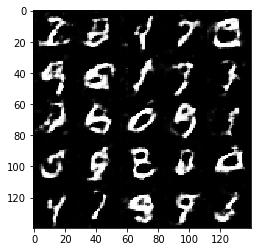

Epoch 2/3... Discriminator Loss: 0.3105... Generator Loss: 1.9314
Epoch 2/3... Discriminator Loss: 0.3062... Generator Loss: 1.8717
Epoch 2/3... Discriminator Loss: 0.3783... Generator Loss: 1.8955
Epoch 2/3... Discriminator Loss: 0.1592... Generator Loss: 2.5107
Epoch 2/3... Discriminator Loss: 0.4197... Generator Loss: 1.5592
Epoch 2/3... Discriminator Loss: 0.4160... Generator Loss: 1.5813
Epoch 2/3... Discriminator Loss: 0.2435... Generator Loss: 2.0669
Epoch 2/3... Discriminator Loss: 0.1173... Generator Loss: 3.5659
Epoch 2/3... Discriminator Loss: 0.4112... Generator Loss: 1.6023
Epoch 2/3... Discriminator Loss: 0.3802... Generator Loss: 1.9070


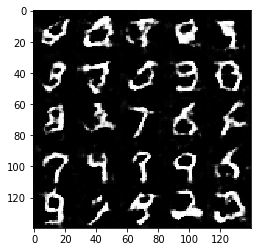

Epoch 2/3... Discriminator Loss: 0.4384... Generator Loss: 1.4499
Epoch 2/3... Discriminator Loss: 0.2451... Generator Loss: 2.3625
Epoch 2/3... Discriminator Loss: 0.2696... Generator Loss: 2.8794
Epoch 2/3... Discriminator Loss: 0.2745... Generator Loss: 1.8701
Epoch 2/3... Discriminator Loss: 0.2908... Generator Loss: 2.5515
Epoch 2/3... Discriminator Loss: 0.2084... Generator Loss: 2.3131
Epoch 2/3... Discriminator Loss: 0.5860... Generator Loss: 1.8059
Epoch 2/3... Discriminator Loss: 0.3670... Generator Loss: 1.6792
Epoch 2/3... Discriminator Loss: 0.2708... Generator Loss: 2.6220
Epoch 2/3... Discriminator Loss: 0.1412... Generator Loss: 3.1734


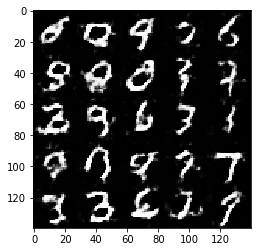

Epoch 2/3... Discriminator Loss: 0.2104... Generator Loss: 2.7020
Epoch 2/3... Discriminator Loss: 0.7295... Generator Loss: 1.0432
Epoch 2/3... Discriminator Loss: 0.2791... Generator Loss: 2.1950
Epoch 2/3... Discriminator Loss: 0.2899... Generator Loss: 1.9369
Epoch 2/3... Discriminator Loss: 0.2556... Generator Loss: 2.1105
Epoch 2/3... Discriminator Loss: 0.1633... Generator Loss: 2.4351
Epoch 2/3... Discriminator Loss: 0.2314... Generator Loss: 2.2523
Epoch 2/3... Discriminator Loss: 0.1394... Generator Loss: 2.5367
Epoch 2/3... Discriminator Loss: 0.4849... Generator Loss: 1.9447
Epoch 2/3... Discriminator Loss: 0.4406... Generator Loss: 1.3711


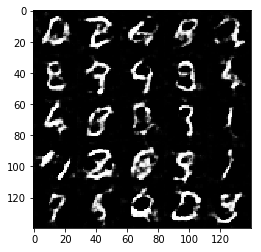

Epoch 2/3... Discriminator Loss: 0.1462... Generator Loss: 2.7245
Epoch 2/3... Discriminator Loss: 0.2494... Generator Loss: 2.0890
Epoch 2/3... Discriminator Loss: 0.3361... Generator Loss: 2.1137
Epoch 2/3... Discriminator Loss: 0.2828... Generator Loss: 1.8539
Epoch 2/3... Discriminator Loss: 0.9964... Generator Loss: 0.6298
Epoch 2/3... Discriminator Loss: 0.2273... Generator Loss: 3.2502
Epoch 2/3... Discriminator Loss: 0.4343... Generator Loss: 1.5195
Epoch 2/3... Discriminator Loss: 0.1575... Generator Loss: 2.2723
Epoch 2/3... Discriminator Loss: 0.5033... Generator Loss: 1.2085
Epoch 2/3... Discriminator Loss: 0.2434... Generator Loss: 2.4297


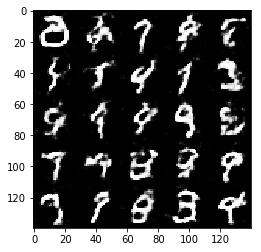

Epoch 2/3... Discriminator Loss: 0.3504... Generator Loss: 2.2247
Epoch 2/3... Discriminator Loss: 0.4852... Generator Loss: 1.3312
Epoch 2/3... Discriminator Loss: 0.6134... Generator Loss: 3.2686
Epoch 2/3... Discriminator Loss: 0.3014... Generator Loss: 2.0145
Epoch 2/3... Discriminator Loss: 0.2931... Generator Loss: 1.7848
Epoch 2/3... Discriminator Loss: 0.4386... Generator Loss: 1.5539
Epoch 2/3... Discriminator Loss: 0.4407... Generator Loss: 1.6257
Epoch 2/3... Discriminator Loss: 0.3714... Generator Loss: 1.5564
Epoch 2/3... Discriminator Loss: 0.2053... Generator Loss: 3.0668
Epoch 2/3... Discriminator Loss: 0.3670... Generator Loss: 2.2451


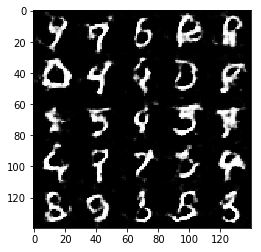

Epoch 2/3... Discriminator Loss: 0.3480... Generator Loss: 2.4597
Epoch 2/3... Discriminator Loss: 0.1132... Generator Loss: 3.4980
Epoch 2/3... Discriminator Loss: 0.2210... Generator Loss: 2.2583
Epoch 2/3... Discriminator Loss: 0.5991... Generator Loss: 1.0308
Epoch 2/3... Discriminator Loss: 0.4383... Generator Loss: 1.1862
Epoch 2/3... Discriminator Loss: 0.3858... Generator Loss: 1.5924
Epoch 2/3... Discriminator Loss: 0.3520... Generator Loss: 2.9982
Epoch 2/3... Discriminator Loss: 0.1731... Generator Loss: 2.5629
Epoch 2/3... Discriminator Loss: 0.1865... Generator Loss: 2.5242
Epoch 2/3... Discriminator Loss: 0.4914... Generator Loss: 1.5551


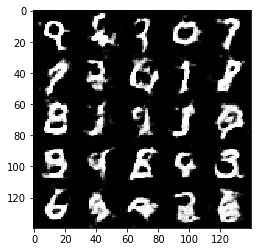

Epoch 2/3... Discriminator Loss: 0.3856... Generator Loss: 1.9171
Epoch 2/3... Discriminator Loss: 0.4077... Generator Loss: 2.7104
Epoch 2/3... Discriminator Loss: 0.4312... Generator Loss: 1.5390
Epoch 2/3... Discriminator Loss: 0.3112... Generator Loss: 2.4128
Epoch 2/3... Discriminator Loss: 0.4445... Generator Loss: 1.5237
Epoch 2/3... Discriminator Loss: 0.1769... Generator Loss: 2.6218
Epoch 2/3... Discriminator Loss: 0.2796... Generator Loss: 2.0025
Epoch 2/3... Discriminator Loss: 0.4813... Generator Loss: 2.1205
Epoch 2/3... Discriminator Loss: 0.2854... Generator Loss: 2.2006
Epoch 2/3... Discriminator Loss: 0.2508... Generator Loss: 1.9574


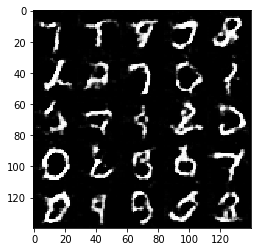

Epoch 2/3... Discriminator Loss: 0.3082... Generator Loss: 3.0328
Epoch 2/3... Discriminator Loss: 0.2357... Generator Loss: 2.0962
Epoch 2/3... Discriminator Loss: 0.6934... Generator Loss: 1.0664
Epoch 2/3... Discriminator Loss: 0.2770... Generator Loss: 2.2369
Epoch 2/3... Discriminator Loss: 0.1807... Generator Loss: 2.4568
Epoch 2/3... Discriminator Loss: 0.2325... Generator Loss: 2.2288
Epoch 2/3... Discriminator Loss: 0.2652... Generator Loss: 2.2791
Epoch 2/3... Discriminator Loss: 0.4985... Generator Loss: 1.4852
Epoch 2/3... Discriminator Loss: 0.1600... Generator Loss: 2.7126
Epoch 2/3... Discriminator Loss: 0.1580... Generator Loss: 2.9274


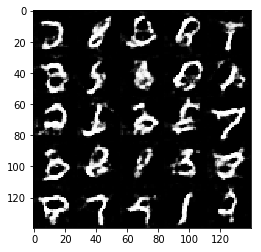

Epoch 2/3... Discriminator Loss: 0.1349... Generator Loss: 2.9909
Epoch 2/3... Discriminator Loss: 0.6417... Generator Loss: 1.2489
Epoch 2/3... Discriminator Loss: 0.1997... Generator Loss: 2.5118
Epoch 2/3... Discriminator Loss: 0.2181... Generator Loss: 2.5040
Epoch 2/3... Discriminator Loss: 0.2004... Generator Loss: 2.8196
Epoch 2/3... Discriminator Loss: 0.2074... Generator Loss: 2.0945
Epoch 2/3... Discriminator Loss: 0.3835... Generator Loss: 1.9104
Epoch 2/3... Discriminator Loss: 0.2939... Generator Loss: 1.8272
Epoch 2/3... Discriminator Loss: 0.2480... Generator Loss: 3.0792
Epoch 2/3... Discriminator Loss: 0.5816... Generator Loss: 1.2642


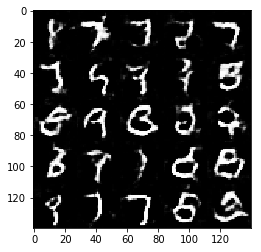

Epoch 2/3... Discriminator Loss: 0.2807... Generator Loss: 2.5699
Epoch 2/3... Discriminator Loss: 0.1927... Generator Loss: 2.7360
Epoch 2/3... Discriminator Loss: 0.1371... Generator Loss: 3.4400
Epoch 2/3... Discriminator Loss: 0.5428... Generator Loss: 2.5477
Epoch 2/3... Discriminator Loss: 0.2726... Generator Loss: 2.3314
Epoch 2/3... Discriminator Loss: 0.1689... Generator Loss: 2.9905
Epoch 2/3... Discriminator Loss: 0.2500... Generator Loss: 2.3716
Epoch 2/3... Discriminator Loss: 0.1815... Generator Loss: 2.7830
Epoch 2/3... Discriminator Loss: 0.3485... Generator Loss: 1.6907
Epoch 2/3... Discriminator Loss: 0.2806... Generator Loss: 3.2986


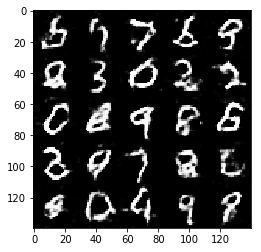

Epoch 2/3... Discriminator Loss: 0.3073... Generator Loss: 1.7073
Epoch 2/3... Discriminator Loss: 0.5880... Generator Loss: 1.4071
Epoch 2/3... Discriminator Loss: 0.2929... Generator Loss: 2.4993
Epoch 2/3... Discriminator Loss: 0.2399... Generator Loss: 1.8874
Epoch 2/3... Discriminator Loss: 0.5148... Generator Loss: 1.2371
Epoch 2/3... Discriminator Loss: 0.1402... Generator Loss: 2.9745
Epoch 2/3... Discriminator Loss: 0.2164... Generator Loss: 2.4680
Epoch 2/3... Discriminator Loss: 0.2631... Generator Loss: 2.0961
Epoch 2/3... Discriminator Loss: 0.5925... Generator Loss: 2.4767
Epoch 2/3... Discriminator Loss: 0.8772... Generator Loss: 0.8046


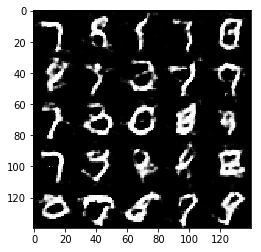

Epoch 2/3... Discriminator Loss: 0.3490... Generator Loss: 3.0924
Epoch 2/3... Discriminator Loss: 0.4387... Generator Loss: 1.9543
Epoch 2/3... Discriminator Loss: 2.0535... Generator Loss: 0.2005
Epoch 2/3... Discriminator Loss: 0.2462... Generator Loss: 2.6369
Epoch 2/3... Discriminator Loss: 0.0939... Generator Loss: 3.0283
Epoch 2/3... Discriminator Loss: 0.3084... Generator Loss: 2.2979
Epoch 2/3... Discriminator Loss: 0.4434... Generator Loss: 1.6833
Epoch 2/3... Discriminator Loss: 0.2279... Generator Loss: 2.4002
Epoch 2/3... Discriminator Loss: 0.3074... Generator Loss: 1.6345
Epoch 2/3... Discriminator Loss: 0.5203... Generator Loss: 1.4021


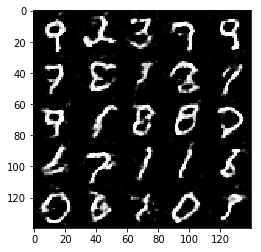

Epoch 2/3... Discriminator Loss: 0.3904... Generator Loss: 2.2816
Epoch 2/3... Discriminator Loss: 0.1921... Generator Loss: 2.7692
Epoch 2/3... Discriminator Loss: 0.3432... Generator Loss: 1.9644
Epoch 2/3... Discriminator Loss: 0.1218... Generator Loss: 3.4054
Epoch 2/3... Discriminator Loss: 0.2943... Generator Loss: 2.0832
Epoch 2/3... Discriminator Loss: 0.1846... Generator Loss: 2.8181
Epoch 2/3... Discriminator Loss: 0.0816... Generator Loss: 3.0679
Epoch 2/3... Discriminator Loss: 0.6723... Generator Loss: 1.2154
Epoch 2/3... Discriminator Loss: 0.2895... Generator Loss: 1.9319
Epoch 2/3... Discriminator Loss: 0.8819... Generator Loss: 2.1660


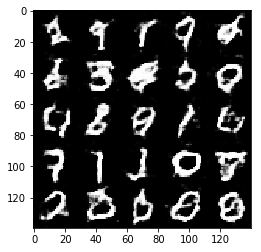

Epoch 2/3... Discriminator Loss: 0.1740... Generator Loss: 2.4311
Epoch 2/3... Discriminator Loss: 0.2816... Generator Loss: 2.5412
Epoch 2/3... Discriminator Loss: 0.4047... Generator Loss: 1.3564
Epoch 2/3... Discriminator Loss: 0.3472... Generator Loss: 2.9643
Epoch 2/3... Discriminator Loss: 0.4124... Generator Loss: 2.4146
Epoch 2/3... Discriminator Loss: 0.2723... Generator Loss: 2.5107
Epoch 2/3... Discriminator Loss: 0.2051... Generator Loss: 3.0200
Epoch 2/3... Discriminator Loss: 0.0883... Generator Loss: 4.1523
Epoch 2/3... Discriminator Loss: 0.3886... Generator Loss: 1.4238
Epoch 2/3... Discriminator Loss: 0.2833... Generator Loss: 2.2563


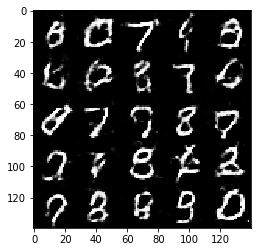

Epoch 2/3... Discriminator Loss: 0.5112... Generator Loss: 1.0779
Epoch 2/3... Discriminator Loss: 0.1084... Generator Loss: 3.3171
Epoch 2/3... Discriminator Loss: 0.1393... Generator Loss: 3.5786
Epoch 2/3... Discriminator Loss: 0.3155... Generator Loss: 1.8733
Epoch 2/3... Discriminator Loss: 0.2726... Generator Loss: 2.1377
Epoch 2/3... Discriminator Loss: 0.3382... Generator Loss: 1.7166
Epoch 2/3... Discriminator Loss: 0.1446... Generator Loss: 3.7991
Epoch 2/3... Discriminator Loss: 0.4429... Generator Loss: 1.6035
Epoch 2/3... Discriminator Loss: 0.3878... Generator Loss: 2.0137
Epoch 2/3... Discriminator Loss: 0.1462... Generator Loss: 2.9599


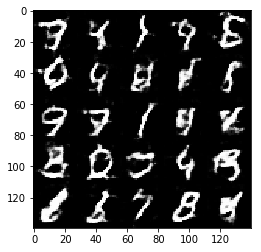

Epoch 2/3... Discriminator Loss: 0.3748... Generator Loss: 1.6014
Epoch 2/3... Discriminator Loss: 0.1378... Generator Loss: 2.7651
Epoch 2/3... Discriminator Loss: 0.2319... Generator Loss: 2.2409
Epoch 2/3... Discriminator Loss: 0.3343... Generator Loss: 2.0191
Epoch 2/3... Discriminator Loss: 0.1386... Generator Loss: 2.8990
Epoch 2/3... Discriminator Loss: 0.2074... Generator Loss: 2.5653
Epoch 2/3... Discriminator Loss: 0.2491... Generator Loss: 2.5166
Epoch 2/3... Discriminator Loss: 1.2801... Generator Loss: 0.6312
Epoch 2/3... Discriminator Loss: 0.1878... Generator Loss: 2.4472
Epoch 2/3... Discriminator Loss: 0.3370... Generator Loss: 2.0240


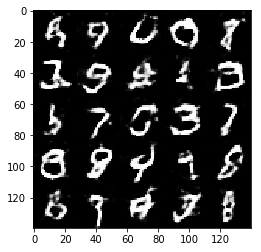

Epoch 2/3... Discriminator Loss: 0.7184... Generator Loss: 1.0120
Epoch 2/3... Discriminator Loss: 0.0988... Generator Loss: 3.3156
Epoch 2/3... Discriminator Loss: 0.4210... Generator Loss: 3.1394
Epoch 2/3... Discriminator Loss: 0.2515... Generator Loss: 2.9447
Epoch 2/3... Discriminator Loss: 0.2928... Generator Loss: 3.5703
Epoch 2/3... Discriminator Loss: 0.2783... Generator Loss: 2.0766
Epoch 2/3... Discriminator Loss: 0.2095... Generator Loss: 2.1514
Epoch 2/3... Discriminator Loss: 0.2940... Generator Loss: 3.1023
Epoch 2/3... Discriminator Loss: 0.3299... Generator Loss: 1.6147
Epoch 2/3... Discriminator Loss: 0.2992... Generator Loss: 2.4037


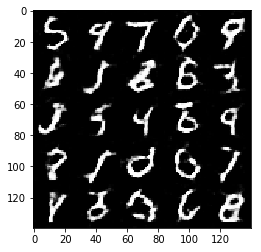

Epoch 2/3... Discriminator Loss: 0.1820... Generator Loss: 2.7154
Epoch 2/3... Discriminator Loss: 0.3477... Generator Loss: 1.8857
Epoch 2/3... Discriminator Loss: 0.3156... Generator Loss: 1.7013
Epoch 2/3... Discriminator Loss: 0.2608... Generator Loss: 2.4622
Epoch 2/3... Discriminator Loss: 0.3287... Generator Loss: 1.8567
Epoch 2/3... Discriminator Loss: 0.1345... Generator Loss: 2.6469
Epoch 2/3... Discriminator Loss: 0.3114... Generator Loss: 1.9027
Epoch 2/3... Discriminator Loss: 0.1889... Generator Loss: 2.1762
Epoch 2/3... Discriminator Loss: 0.1786... Generator Loss: 2.8124
Epoch 2/3... Discriminator Loss: 0.3430... Generator Loss: 1.7619


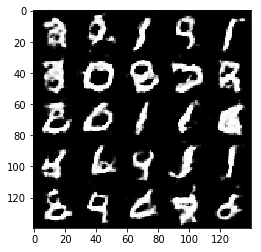

Epoch 2/3... Discriminator Loss: 0.4990... Generator Loss: 1.1638
Epoch 2/3... Discriminator Loss: 0.2311... Generator Loss: 2.5624
Epoch 2/3... Discriminator Loss: 0.4338... Generator Loss: 1.6357
Epoch 2/3... Discriminator Loss: 0.3142... Generator Loss: 2.6742
Epoch 2/3... Discriminator Loss: 0.1590... Generator Loss: 3.1313
Epoch 2/3... Discriminator Loss: 0.2083... Generator Loss: 2.2292
Epoch 2/3... Discriminator Loss: 0.2127... Generator Loss: 2.2407
Epoch 2/3... Discriminator Loss: 0.2061... Generator Loss: 3.0199
Epoch 2/3... Discriminator Loss: 0.2157... Generator Loss: 2.3010
Epoch 2/3... Discriminator Loss: 0.2059... Generator Loss: 2.7540


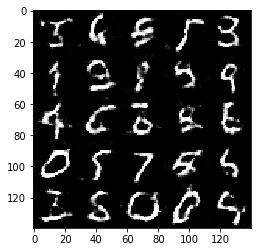

Epoch 2/3... Discriminator Loss: 0.4272... Generator Loss: 1.5740
Epoch 2/3... Discriminator Loss: 0.5117... Generator Loss: 1.3486
Epoch 2/3... Discriminator Loss: 0.3016... Generator Loss: 2.1172
Epoch 2/3... Discriminator Loss: 0.1392... Generator Loss: 2.7947
Epoch 2/3... Discriminator Loss: 0.1455... Generator Loss: 2.5462
Epoch 2/3... Discriminator Loss: 0.2186... Generator Loss: 2.2102
Epoch 2/3... Discriminator Loss: 0.1562... Generator Loss: 2.8474
Epoch 2/3... Discriminator Loss: 0.2799... Generator Loss: 1.9816
Epoch 2/3... Discriminator Loss: 0.2116... Generator Loss: 2.2645
Epoch 2/3... Discriminator Loss: 0.2207... Generator Loss: 2.0737


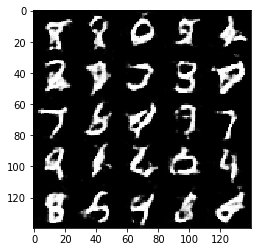

Epoch 2/3... Discriminator Loss: 0.2763... Generator Loss: 2.2538
Epoch 2/3... Discriminator Loss: 0.4780... Generator Loss: 1.4527
Epoch 2/3... Discriminator Loss: 0.2954... Generator Loss: 1.8648
Epoch 2/3... Discriminator Loss: 0.1522... Generator Loss: 2.6721
Epoch 2/3... Discriminator Loss: 0.2113... Generator Loss: 2.2962
Epoch 2/3... Discriminator Loss: 0.2346... Generator Loss: 3.2730
Epoch 2/3... Discriminator Loss: 0.2582... Generator Loss: 2.0263
Epoch 2/3... Discriminator Loss: 0.3071... Generator Loss: 2.0314
Epoch 2/3... Discriminator Loss: 0.2612... Generator Loss: 1.7173
Epoch 2/3... Discriminator Loss: 0.2131... Generator Loss: 2.7951


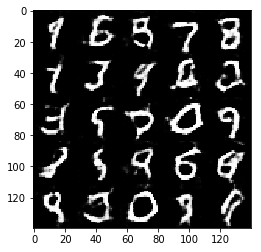

Epoch 2/3... Discriminator Loss: 0.2622... Generator Loss: 1.9348
Epoch 2/3... Discriminator Loss: 0.1753... Generator Loss: 2.3771
Epoch 2/3... Discriminator Loss: 0.2838... Generator Loss: 2.1038
Epoch 2/3... Discriminator Loss: 0.3605... Generator Loss: 3.1762
Epoch 2/3... Discriminator Loss: 0.1663... Generator Loss: 2.3912
Epoch 2/3... Discriminator Loss: 0.1282... Generator Loss: 3.6254
Epoch 2/3... Discriminator Loss: 0.2743... Generator Loss: 1.9273
Epoch 2/3... Discriminator Loss: 0.3442... Generator Loss: 2.4069
Epoch 2/3... Discriminator Loss: 0.2247... Generator Loss: 2.6847
Epoch 2/3... Discriminator Loss: 0.2327... Generator Loss: 1.8638


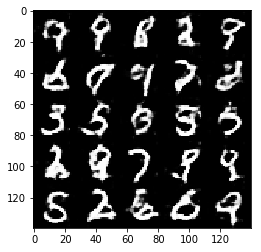

Epoch 2/3... Discriminator Loss: 0.3396... Generator Loss: 1.5137
Epoch 2/3... Discriminator Loss: 0.1600... Generator Loss: 2.5715
Epoch 2/3... Discriminator Loss: 0.2743... Generator Loss: 2.0715
Epoch 2/3... Discriminator Loss: 0.2654... Generator Loss: 1.8874
Epoch 2/3... Discriminator Loss: 0.2066... Generator Loss: 2.6355
Epoch 2/3... Discriminator Loss: 0.2277... Generator Loss: 2.4864
Epoch 2/3... Discriminator Loss: 0.2246... Generator Loss: 3.6525
Epoch 2/3... Discriminator Loss: 0.2302... Generator Loss: 1.9494
Epoch 2/3... Discriminator Loss: 0.4979... Generator Loss: 2.2715
Epoch 2/3... Discriminator Loss: 0.2355... Generator Loss: 2.2169


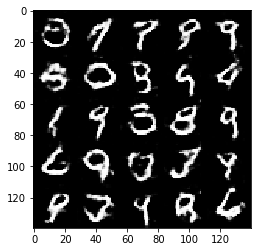

Epoch 2/3... Discriminator Loss: 0.1050... Generator Loss: 3.0599
Epoch 2/3... Discriminator Loss: 0.3148... Generator Loss: 1.9188
Epoch 2/3... Discriminator Loss: 0.2755... Generator Loss: 2.3160
Epoch 2/3... Discriminator Loss: 0.3031... Generator Loss: 1.7435
Epoch 2/3... Discriminator Loss: 0.8547... Generator Loss: 0.8355
Epoch 2/3... Discriminator Loss: 0.1906... Generator Loss: 2.5894
Epoch 2/3... Discriminator Loss: 0.1131... Generator Loss: 3.5409
Epoch 2/3... Discriminator Loss: 0.4187... Generator Loss: 1.4274
Epoch 2/3... Discriminator Loss: 0.8384... Generator Loss: 0.8822
Epoch 2/3... Discriminator Loss: 0.1398... Generator Loss: 2.7843


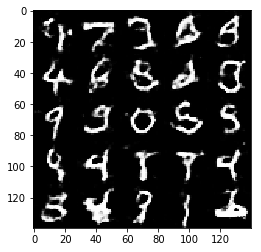

Epoch 2/3... Discriminator Loss: 0.2061... Generator Loss: 2.1234
Epoch 2/3... Discriminator Loss: 0.1986... Generator Loss: 2.4198
Epoch 2/3... Discriminator Loss: 0.2818... Generator Loss: 2.1095
Epoch 2/3... Discriminator Loss: 0.3512... Generator Loss: 1.6742
Epoch 2/3... Discriminator Loss: 0.3647... Generator Loss: 1.4649
Epoch 2/3... Discriminator Loss: 0.5591... Generator Loss: 1.0312
Epoch 2/3... Discriminator Loss: 0.6174... Generator Loss: 1.3109
Epoch 2/3... Discriminator Loss: 0.1215... Generator Loss: 3.6117
Epoch 2/3... Discriminator Loss: 0.2679... Generator Loss: 2.3729
Epoch 2/3... Discriminator Loss: 0.2125... Generator Loss: 2.0488


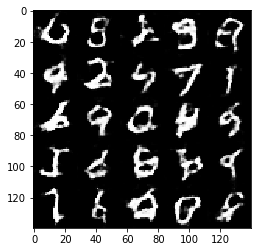

Epoch 2/3... Discriminator Loss: 0.1603... Generator Loss: 4.1134
Epoch 2/3... Discriminator Loss: 0.2042... Generator Loss: 2.2084
Epoch 2/3... Discriminator Loss: 0.2231... Generator Loss: 2.1480
Epoch 2/3... Discriminator Loss: 0.2732... Generator Loss: 1.6366
Epoch 2/3... Discriminator Loss: 0.4127... Generator Loss: 1.5414
Epoch 2/3... Discriminator Loss: 0.1918... Generator Loss: 2.6940
Epoch 2/3... Discriminator Loss: 1.3148... Generator Loss: 4.5655
Epoch 2/3... Discriminator Loss: 0.3535... Generator Loss: 1.7142
Epoch 2/3... Discriminator Loss: 0.2540... Generator Loss: 2.0228
Epoch 2/3... Discriminator Loss: 0.2204... Generator Loss: 1.9076


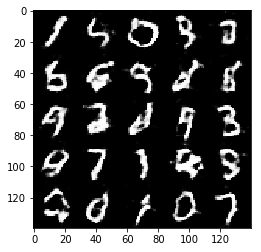

Epoch 2/3... Discriminator Loss: 0.2268... Generator Loss: 2.0579
Epoch 2/3... Discriminator Loss: 0.2932... Generator Loss: 2.0633
Epoch 2/3... Discriminator Loss: 0.1396... Generator Loss: 2.6643
Epoch 2/3... Discriminator Loss: 0.1995... Generator Loss: 3.5322
Epoch 2/3... Discriminator Loss: 0.1307... Generator Loss: 3.6707
Epoch 2/3... Discriminator Loss: 0.2037... Generator Loss: 2.3049
Epoch 2/3... Discriminator Loss: 0.2078... Generator Loss: 2.4164
Epoch 2/3... Discriminator Loss: 0.1464... Generator Loss: 3.1140
Epoch 2/3... Discriminator Loss: 0.3047... Generator Loss: 2.3727
Epoch 2/3... Discriminator Loss: 0.2258... Generator Loss: 2.2898


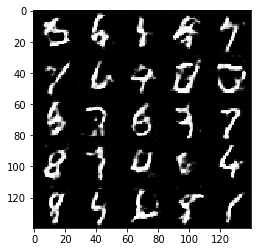

Epoch 2/3... Discriminator Loss: 0.1179... Generator Loss: 2.8613
Epoch 2/3... Discriminator Loss: 0.1463... Generator Loss: 2.7569
Epoch 2/3... Discriminator Loss: 0.5813... Generator Loss: 1.1984
Epoch 2/3... Discriminator Loss: 0.2992... Generator Loss: 1.9267
Epoch 2/3... Discriminator Loss: 0.0639... Generator Loss: 5.4046
Epoch 2/3... Discriminator Loss: 0.3276... Generator Loss: 1.8575
Epoch 2/3... Discriminator Loss: 0.2370... Generator Loss: 1.9146
Epoch 2/3... Discriminator Loss: 0.1090... Generator Loss: 3.3946
Epoch 2/3... Discriminator Loss: 0.1849... Generator Loss: 2.4634
Epoch 2/3... Discriminator Loss: 0.1886... Generator Loss: 2.9213


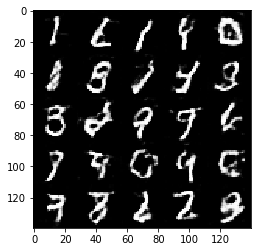

Epoch 2/3... Discriminator Loss: 0.2798... Generator Loss: 1.9461
Epoch 2/3... Discriminator Loss: 0.4417... Generator Loss: 1.2251
Epoch 2/3... Discriminator Loss: 0.2509... Generator Loss: 2.8199
Epoch 2/3... Discriminator Loss: 0.3865... Generator Loss: 2.8390
Epoch 2/3... Discriminator Loss: 0.3429... Generator Loss: 1.5991
Epoch 2/3... Discriminator Loss: 0.4093... Generator Loss: 1.7149
Epoch 2/3... Discriminator Loss: 0.5854... Generator Loss: 1.2035
Epoch 2/3... Discriminator Loss: 0.2075... Generator Loss: 2.1966
Epoch 2/3... Discriminator Loss: 0.1784... Generator Loss: 2.8899
Epoch 2/3... Discriminator Loss: 0.4165... Generator Loss: 1.7664


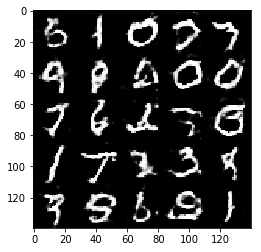

Epoch 2/3... Discriminator Loss: 0.1563... Generator Loss: 2.9653
Epoch 2/3... Discriminator Loss: 0.1763... Generator Loss: 2.4030
Epoch 2/3... Discriminator Loss: 0.1396... Generator Loss: 3.0258
Epoch 2/3... Discriminator Loss: 0.0742... Generator Loss: 3.4210
Epoch 2/3... Discriminator Loss: 0.4971... Generator Loss: 1.3807
Epoch 2/3... Discriminator Loss: 0.4140... Generator Loss: 1.4772
Epoch 2/3... Discriminator Loss: 0.1682... Generator Loss: 2.6236
Epoch 2/3... Discriminator Loss: 0.1978... Generator Loss: 2.6321
Epoch 2/3... Discriminator Loss: 0.3036... Generator Loss: 2.0638
Epoch 2/3... Discriminator Loss: 0.1497... Generator Loss: 2.7122


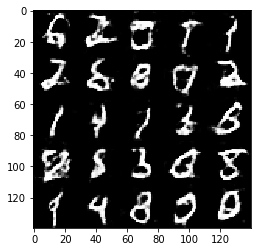

Epoch 2/3... Discriminator Loss: 0.2094... Generator Loss: 1.9946
Epoch 2/3... Discriminator Loss: 0.1813... Generator Loss: 2.3182
Epoch 2/3... Discriminator Loss: 0.2178... Generator Loss: 1.9096
Epoch 2/3... Discriminator Loss: 0.1890... Generator Loss: 2.5170
Epoch 2/3... Discriminator Loss: 0.1695... Generator Loss: 2.7754
Epoch 2/3... Discriminator Loss: 0.1244... Generator Loss: 2.6706
Epoch 2/3... Discriminator Loss: 0.0701... Generator Loss: 4.5071
Epoch 2/3... Discriminator Loss: 0.1278... Generator Loss: 2.6678
Epoch 2/3... Discriminator Loss: 0.2744... Generator Loss: 1.9149
Epoch 2/3... Discriminator Loss: 0.1320... Generator Loss: 2.6151


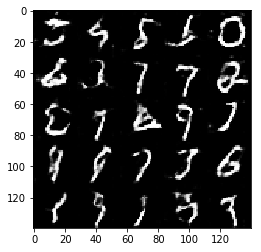

Epoch 2/3... Discriminator Loss: 0.1699... Generator Loss: 2.6206
Epoch 2/3... Discriminator Loss: 0.1727... Generator Loss: 2.5747
Epoch 2/3... Discriminator Loss: 0.3879... Generator Loss: 1.4515
Epoch 2/3... Discriminator Loss: 0.1795... Generator Loss: 2.6946
Epoch 2/3... Discriminator Loss: 0.1672... Generator Loss: 2.5804
Epoch 2/3... Discriminator Loss: 0.1247... Generator Loss: 2.9299
Epoch 2/3... Discriminator Loss: 0.2114... Generator Loss: 2.4187
Epoch 2/3... Discriminator Loss: 0.0770... Generator Loss: 4.1097
Epoch 2/3... Discriminator Loss: 0.1276... Generator Loss: 2.6844
Epoch 2/3... Discriminator Loss: 0.0833... Generator Loss: 3.7585


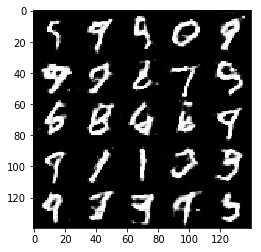

Epoch 2/3... Discriminator Loss: 0.2729... Generator Loss: 1.8703
Epoch 2/3... Discriminator Loss: 0.0800... Generator Loss: 3.4875
Epoch 2/3... Discriminator Loss: 0.2340... Generator Loss: 2.3612
Epoch 2/3... Discriminator Loss: 0.3391... Generator Loss: 1.7552
Epoch 2/3... Discriminator Loss: 0.3167... Generator Loss: 2.2081
Epoch 2/3... Discriminator Loss: 0.1312... Generator Loss: 2.9949
Epoch 2/3... Discriminator Loss: 0.1541... Generator Loss: 2.2781
Epoch 2/3... Discriminator Loss: 0.2346... Generator Loss: 1.9364
Epoch 2/3... Discriminator Loss: 0.1783... Generator Loss: 2.4414
Epoch 2/3... Discriminator Loss: 0.1147... Generator Loss: 3.1880


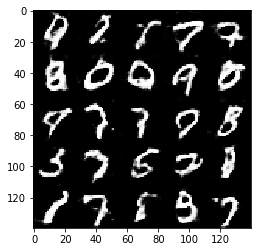

Epoch 2/3... Discriminator Loss: 0.3243... Generator Loss: 2.0573
Epoch 2/3... Discriminator Loss: 0.1141... Generator Loss: 2.6560
Epoch 2/3... Discriminator Loss: 0.2039... Generator Loss: 2.9764
Epoch 2/3... Discriminator Loss: 0.2892... Generator Loss: 1.7828
Epoch 2/3... Discriminator Loss: 0.3422... Generator Loss: 1.7399
Epoch 2/3... Discriminator Loss: 0.3457... Generator Loss: 1.7292
Epoch 2/3... Discriminator Loss: 0.1900... Generator Loss: 2.5225
Epoch 2/3... Discriminator Loss: 2.3518... Generator Loss: 0.2086
Epoch 2/3... Discriminator Loss: 0.2480... Generator Loss: 1.9378
Epoch 2/3... Discriminator Loss: 0.5569... Generator Loss: 1.4492


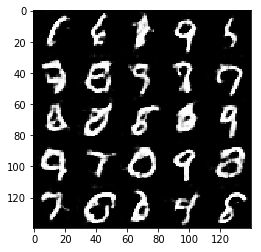

Epoch 2/3... Discriminator Loss: 0.3550... Generator Loss: 1.9361
Epoch 2/3... Discriminator Loss: 0.1504... Generator Loss: 2.7586
Epoch 2/3... Discriminator Loss: 0.0978... Generator Loss: 3.6625
Epoch 2/3... Discriminator Loss: 0.4330... Generator Loss: 1.3584
Epoch 2/3... Discriminator Loss: 0.3271... Generator Loss: 1.9099
Epoch 2/3... Discriminator Loss: 0.0971... Generator Loss: 3.0760
Epoch 2/3... Discriminator Loss: 0.3084... Generator Loss: 1.9095
Epoch 2/3... Discriminator Loss: 0.1644... Generator Loss: 2.4682
Epoch 2/3... Discriminator Loss: 0.0817... Generator Loss: 3.0218
Epoch 2/3... Discriminator Loss: 0.2730... Generator Loss: 2.0451


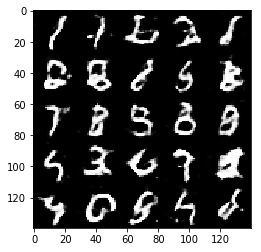

Epoch 3/3... Discriminator Loss: 0.1047... Generator Loss: 3.0876
Epoch 3/3... Discriminator Loss: 0.0928... Generator Loss: 3.1571
Epoch 3/3... Discriminator Loss: 0.4723... Generator Loss: 4.3411
Epoch 3/3... Discriminator Loss: 0.1275... Generator Loss: 3.1597
Epoch 3/3... Discriminator Loss: 0.1237... Generator Loss: 2.9493
Epoch 3/3... Discriminator Loss: 0.4326... Generator Loss: 1.4225
Epoch 3/3... Discriminator Loss: 0.1425... Generator Loss: 2.6296
Epoch 3/3... Discriminator Loss: 0.2668... Generator Loss: 2.2317
Epoch 3/3... Discriminator Loss: 0.1792... Generator Loss: 2.3789
Epoch 3/3... Discriminator Loss: 0.2060... Generator Loss: 3.1416


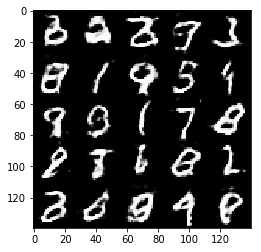

Epoch 3/3... Discriminator Loss: 0.2204... Generator Loss: 2.2147
Epoch 3/3... Discriminator Loss: 0.3803... Generator Loss: 1.5691
Epoch 3/3... Discriminator Loss: 0.1595... Generator Loss: 2.6966
Epoch 3/3... Discriminator Loss: 0.3524... Generator Loss: 1.5249
Epoch 3/3... Discriminator Loss: 0.1434... Generator Loss: 3.3724
Epoch 3/3... Discriminator Loss: 0.1571... Generator Loss: 2.4781
Epoch 3/3... Discriminator Loss: 0.0868... Generator Loss: 3.4568
Epoch 3/3... Discriminator Loss: 0.2353... Generator Loss: 2.1998
Epoch 3/3... Discriminator Loss: 0.2218... Generator Loss: 2.0456
Epoch 3/3... Discriminator Loss: 0.3018... Generator Loss: 1.9353


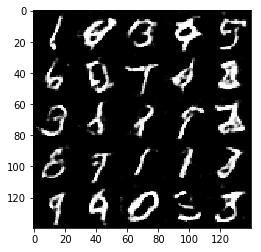

Epoch 3/3... Discriminator Loss: 0.1445... Generator Loss: 2.5482
Epoch 3/3... Discriminator Loss: 1.0666... Generator Loss: 0.8552
Epoch 3/3... Discriminator Loss: 1.7831... Generator Loss: 6.2082
Epoch 3/3... Discriminator Loss: 0.3906... Generator Loss: 1.8143
Epoch 3/3... Discriminator Loss: 0.1994... Generator Loss: 2.5693
Epoch 3/3... Discriminator Loss: 0.3285... Generator Loss: 1.7099
Epoch 3/3... Discriminator Loss: 0.0849... Generator Loss: 3.0456
Epoch 3/3... Discriminator Loss: 0.3634... Generator Loss: 1.5535
Epoch 3/3... Discriminator Loss: 0.1246... Generator Loss: 2.9067
Epoch 3/3... Discriminator Loss: 0.3671... Generator Loss: 2.0266


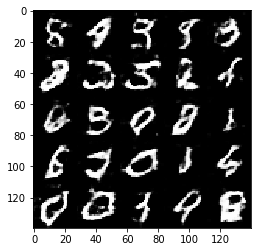

Epoch 3/3... Discriminator Loss: 0.3394... Generator Loss: 1.7661
Epoch 3/3... Discriminator Loss: 0.1445... Generator Loss: 2.9722
Epoch 3/3... Discriminator Loss: 0.2034... Generator Loss: 2.8246
Epoch 3/3... Discriminator Loss: 0.2323... Generator Loss: 1.9597
Epoch 3/3... Discriminator Loss: 0.1910... Generator Loss: 2.4240
Epoch 3/3... Discriminator Loss: 0.3110... Generator Loss: 1.9361
Epoch 3/3... Discriminator Loss: 0.2177... Generator Loss: 2.1279
Epoch 3/3... Discriminator Loss: 0.0875... Generator Loss: 3.4978
Epoch 3/3... Discriminator Loss: 0.1323... Generator Loss: 2.5711
Epoch 3/3... Discriminator Loss: 0.6175... Generator Loss: 4.6388


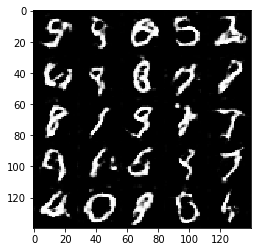

Epoch 3/3... Discriminator Loss: 0.2618... Generator Loss: 1.9012
Epoch 3/3... Discriminator Loss: 0.6788... Generator Loss: 1.2648
Epoch 3/3... Discriminator Loss: 0.4042... Generator Loss: 1.8281
Epoch 3/3... Discriminator Loss: 0.0756... Generator Loss: 4.3879
Epoch 3/3... Discriminator Loss: 0.2585... Generator Loss: 2.1602
Epoch 3/3... Discriminator Loss: 0.0465... Generator Loss: 4.0059
Epoch 3/3... Discriminator Loss: 0.1946... Generator Loss: 2.2737
Epoch 3/3... Discriminator Loss: 0.1025... Generator Loss: 3.6323
Epoch 3/3... Discriminator Loss: 0.2598... Generator Loss: 2.0431
Epoch 3/3... Discriminator Loss: 0.2979... Generator Loss: 1.9721


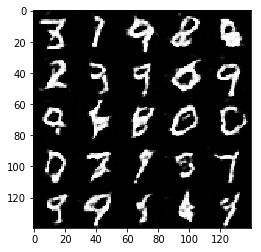

Epoch 3/3... Discriminator Loss: 0.1059... Generator Loss: 3.3711
Epoch 3/3... Discriminator Loss: 0.2999... Generator Loss: 1.6224
Epoch 3/3... Discriminator Loss: 0.1324... Generator Loss: 2.7141
Epoch 3/3... Discriminator Loss: 0.3064... Generator Loss: 1.9997
Epoch 3/3... Discriminator Loss: 0.2750... Generator Loss: 2.0845
Epoch 3/3... Discriminator Loss: 0.2540... Generator Loss: 1.8113
Epoch 3/3... Discriminator Loss: 0.2329... Generator Loss: 2.0403
Epoch 3/3... Discriminator Loss: 0.5220... Generator Loss: 1.4601
Epoch 3/3... Discriminator Loss: 0.4403... Generator Loss: 1.7211
Epoch 3/3... Discriminator Loss: 1.2542... Generator Loss: 0.5365


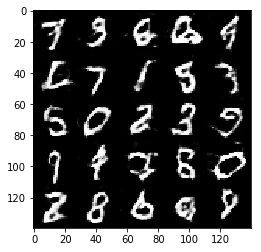

Epoch 3/3... Discriminator Loss: 0.2052... Generator Loss: 2.4160
Epoch 3/3... Discriminator Loss: 0.1040... Generator Loss: 3.4320
Epoch 3/3... Discriminator Loss: 0.1890... Generator Loss: 2.0890
Epoch 3/3... Discriminator Loss: 0.3187... Generator Loss: 1.7344
Epoch 3/3... Discriminator Loss: 0.1858... Generator Loss: 2.4583
Epoch 3/3... Discriminator Loss: 0.2333... Generator Loss: 3.2006
Epoch 3/3... Discriminator Loss: 0.1808... Generator Loss: 2.5430
Epoch 3/3... Discriminator Loss: 0.1570... Generator Loss: 2.4449
Epoch 3/3... Discriminator Loss: 0.1217... Generator Loss: 3.5569
Epoch 3/3... Discriminator Loss: 0.1728... Generator Loss: 2.5042


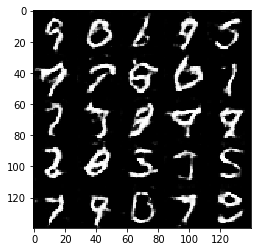

Epoch 3/3... Discriminator Loss: 0.1642... Generator Loss: 2.4583
Epoch 3/3... Discriminator Loss: 0.1874... Generator Loss: 2.8071
Epoch 3/3... Discriminator Loss: 1.0666... Generator Loss: 0.6708
Epoch 3/3... Discriminator Loss: 0.2741... Generator Loss: 1.9562
Epoch 3/3... Discriminator Loss: 0.2520... Generator Loss: 2.3358
Epoch 3/3... Discriminator Loss: 0.3549... Generator Loss: 4.1148
Epoch 3/3... Discriminator Loss: 0.0721... Generator Loss: 3.9454
Epoch 3/3... Discriminator Loss: 0.1955... Generator Loss: 1.9520
Epoch 3/3... Discriminator Loss: 0.1039... Generator Loss: 4.4615
Epoch 3/3... Discriminator Loss: 0.2563... Generator Loss: 1.8408


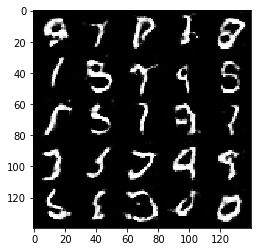

Epoch 3/3... Discriminator Loss: 0.1469... Generator Loss: 2.5738
Epoch 3/3... Discriminator Loss: 0.0697... Generator Loss: 3.2172
Epoch 3/3... Discriminator Loss: 0.1442... Generator Loss: 2.5770
Epoch 3/3... Discriminator Loss: 0.0668... Generator Loss: 3.1750
Epoch 3/3... Discriminator Loss: 0.1566... Generator Loss: 3.8925
Epoch 3/3... Discriminator Loss: 0.1848... Generator Loss: 2.5770
Epoch 3/3... Discriminator Loss: 0.2907... Generator Loss: 3.1355
Epoch 3/3... Discriminator Loss: 0.4328... Generator Loss: 1.2584
Epoch 3/3... Discriminator Loss: 0.2430... Generator Loss: 2.3062
Epoch 3/3... Discriminator Loss: 0.1563... Generator Loss: 4.8744


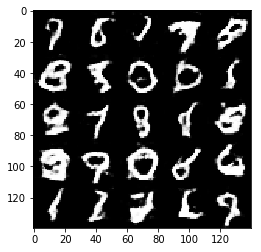

Epoch 3/3... Discriminator Loss: 0.2344... Generator Loss: 2.1540
Epoch 3/3... Discriminator Loss: 0.1917... Generator Loss: 5.0157
Epoch 3/3... Discriminator Loss: 0.4204... Generator Loss: 3.0665
Epoch 3/3... Discriminator Loss: 0.0976... Generator Loss: 3.0230
Epoch 3/3... Discriminator Loss: 0.1468... Generator Loss: 2.5676
Epoch 3/3... Discriminator Loss: 0.2721... Generator Loss: 1.7909
Epoch 3/3... Discriminator Loss: 0.1784... Generator Loss: 2.4540
Epoch 3/3... Discriminator Loss: 0.4271... Generator Loss: 1.7357
Epoch 3/3... Discriminator Loss: 0.2332... Generator Loss: 2.2359
Epoch 3/3... Discriminator Loss: 0.0943... Generator Loss: 3.1317


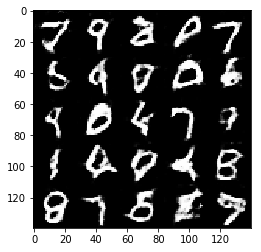

Epoch 3/3... Discriminator Loss: 0.2035... Generator Loss: 2.1303
Epoch 3/3... Discriminator Loss: 0.4071... Generator Loss: 1.4098
Epoch 3/3... Discriminator Loss: 0.2550... Generator Loss: 2.1903
Epoch 3/3... Discriminator Loss: 0.1133... Generator Loss: 3.2202
Epoch 3/3... Discriminator Loss: 0.1089... Generator Loss: 3.2165
Epoch 3/3... Discriminator Loss: 0.2947... Generator Loss: 1.8594
Epoch 3/3... Discriminator Loss: 0.1764... Generator Loss: 3.1135
Epoch 3/3... Discriminator Loss: 0.2574... Generator Loss: 2.0484
Epoch 3/3... Discriminator Loss: 0.0729... Generator Loss: 3.6183
Epoch 3/3... Discriminator Loss: 0.1193... Generator Loss: 2.9023


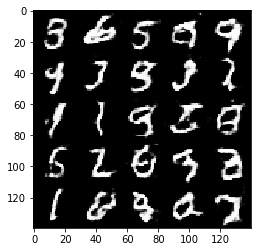

Epoch 3/3... Discriminator Loss: 0.2253... Generator Loss: 2.2524
Epoch 3/3... Discriminator Loss: 0.2928... Generator Loss: 1.7320
Epoch 3/3... Discriminator Loss: 0.1500... Generator Loss: 2.5626
Epoch 3/3... Discriminator Loss: 0.1038... Generator Loss: 2.9782
Epoch 3/3... Discriminator Loss: 0.2514... Generator Loss: 2.9894
Epoch 3/3... Discriminator Loss: 0.1058... Generator Loss: 2.8292
Epoch 3/3... Discriminator Loss: 0.1610... Generator Loss: 2.5857
Epoch 3/3... Discriminator Loss: 0.1492... Generator Loss: 2.7030
Epoch 3/3... Discriminator Loss: 0.2552... Generator Loss: 1.9240
Epoch 3/3... Discriminator Loss: 0.2732... Generator Loss: 2.0966


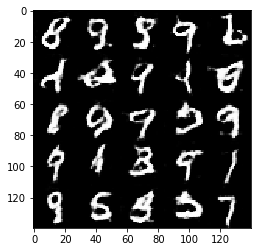

Epoch 3/3... Discriminator Loss: 0.1863... Generator Loss: 2.2865
Epoch 3/3... Discriminator Loss: 0.0715... Generator Loss: 4.3303
Epoch 3/3... Discriminator Loss: 0.0744... Generator Loss: 2.9415
Epoch 3/3... Discriminator Loss: 0.2130... Generator Loss: 2.2166
Epoch 3/3... Discriminator Loss: 0.1523... Generator Loss: 2.6876
Epoch 3/3... Discriminator Loss: 0.1809... Generator Loss: 2.8886
Epoch 3/3... Discriminator Loss: 0.8568... Generator Loss: 0.8969
Epoch 3/3... Discriminator Loss: 0.5917... Generator Loss: 4.8642
Epoch 3/3... Discriminator Loss: 0.1338... Generator Loss: 2.7699
Epoch 3/3... Discriminator Loss: 0.7997... Generator Loss: 1.0671


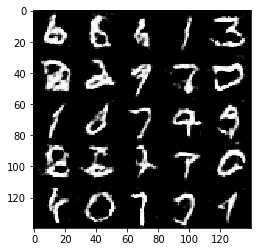

Epoch 3/3... Discriminator Loss: 0.0996... Generator Loss: 3.4310
Epoch 3/3... Discriminator Loss: 0.1092... Generator Loss: 2.4847
Epoch 3/3... Discriminator Loss: 0.2788... Generator Loss: 1.8088
Epoch 3/3... Discriminator Loss: 1.0130... Generator Loss: 0.7208
Epoch 3/3... Discriminator Loss: 0.4836... Generator Loss: 1.1710
Epoch 3/3... Discriminator Loss: 0.3118... Generator Loss: 1.6968
Epoch 3/3... Discriminator Loss: 0.2968... Generator Loss: 1.9657
Epoch 3/3... Discriminator Loss: 0.6740... Generator Loss: 1.2416
Epoch 3/3... Discriminator Loss: 0.1527... Generator Loss: 2.9199
Epoch 3/3... Discriminator Loss: 0.0703... Generator Loss: 3.7466


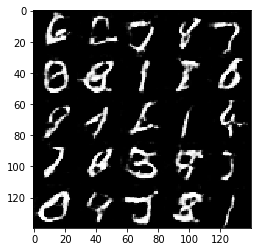

Epoch 3/3... Discriminator Loss: 0.1473... Generator Loss: 2.4456
Epoch 3/3... Discriminator Loss: 0.1706... Generator Loss: 2.4494
Epoch 3/3... Discriminator Loss: 0.2657... Generator Loss: 2.1025
Epoch 3/3... Discriminator Loss: 0.3510... Generator Loss: 1.6663
Epoch 3/3... Discriminator Loss: 0.1949... Generator Loss: 3.2077
Epoch 3/3... Discriminator Loss: 0.1819... Generator Loss: 2.8915
Epoch 3/3... Discriminator Loss: 0.2660... Generator Loss: 2.3032
Epoch 3/3... Discriminator Loss: 0.1030... Generator Loss: 2.9059
Epoch 3/3... Discriminator Loss: 0.0690... Generator Loss: 4.1616
Epoch 3/3... Discriminator Loss: 0.1459... Generator Loss: 2.6378


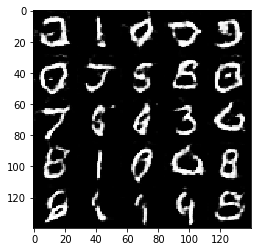

Epoch 3/3... Discriminator Loss: 0.2203... Generator Loss: 2.1282
Epoch 3/3... Discriminator Loss: 0.0839... Generator Loss: 4.8949
Epoch 3/3... Discriminator Loss: 0.4448... Generator Loss: 1.4305
Epoch 3/3... Discriminator Loss: 0.2189... Generator Loss: 2.1756
Epoch 3/3... Discriminator Loss: 0.3222... Generator Loss: 1.7615
Epoch 3/3... Discriminator Loss: 0.1162... Generator Loss: 3.2726
Epoch 3/3... Discriminator Loss: 0.1110... Generator Loss: 3.5744
Epoch 3/3... Discriminator Loss: 0.2876... Generator Loss: 1.7723
Epoch 3/3... Discriminator Loss: 0.9387... Generator Loss: 7.3932
Epoch 3/3... Discriminator Loss: 0.1284... Generator Loss: 2.8502


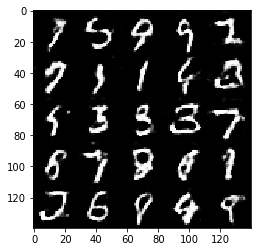

Epoch 3/3... Discriminator Loss: 0.3081... Generator Loss: 2.0916
Epoch 3/3... Discriminator Loss: 0.1198... Generator Loss: 2.8365
Epoch 3/3... Discriminator Loss: 0.0838... Generator Loss: 3.4839
Epoch 3/3... Discriminator Loss: 0.3207... Generator Loss: 2.0463
Epoch 3/3... Discriminator Loss: 0.7548... Generator Loss: 0.8795
Epoch 3/3... Discriminator Loss: 0.1636... Generator Loss: 2.3583
Epoch 3/3... Discriminator Loss: 0.0873... Generator Loss: 3.6074
Epoch 3/3... Discriminator Loss: 0.1770... Generator Loss: 2.4180
Epoch 3/3... Discriminator Loss: 0.1865... Generator Loss: 2.3066
Epoch 3/3... Discriminator Loss: 0.1777... Generator Loss: 2.2686


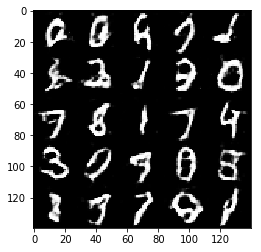

Epoch 3/3... Discriminator Loss: 0.2789... Generator Loss: 2.2335
Epoch 3/3... Discriminator Loss: 0.1349... Generator Loss: 2.4840
Epoch 3/3... Discriminator Loss: 0.0730... Generator Loss: 3.4676
Epoch 3/3... Discriminator Loss: 0.2142... Generator Loss: 2.2227
Epoch 3/3... Discriminator Loss: 0.0947... Generator Loss: 3.0662
Epoch 3/3... Discriminator Loss: 0.2635... Generator Loss: 1.8395
Epoch 3/3... Discriminator Loss: 0.1895... Generator Loss: 2.2204
Epoch 3/3... Discriminator Loss: 0.2131... Generator Loss: 2.2589
Epoch 3/3... Discriminator Loss: 0.1176... Generator Loss: 3.2045
Epoch 3/3... Discriminator Loss: 0.0336... Generator Loss: 4.5005


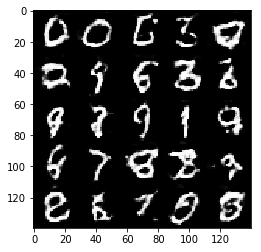

Epoch 3/3... Discriminator Loss: 0.1741... Generator Loss: 3.6050
Epoch 3/3... Discriminator Loss: 0.5900... Generator Loss: 1.0341
Epoch 3/3... Discriminator Loss: 0.4842... Generator Loss: 1.5256
Epoch 3/3... Discriminator Loss: 0.1385... Generator Loss: 2.6093
Epoch 3/3... Discriminator Loss: 0.2496... Generator Loss: 2.0088
Epoch 3/3... Discriminator Loss: 0.8911... Generator Loss: 0.7714
Epoch 3/3... Discriminator Loss: 0.0529... Generator Loss: 4.1604
Epoch 3/3... Discriminator Loss: 0.2709... Generator Loss: 1.9985
Epoch 3/3... Discriminator Loss: 1.0397... Generator Loss: 0.8346
Epoch 3/3... Discriminator Loss: 0.1583... Generator Loss: 3.8552


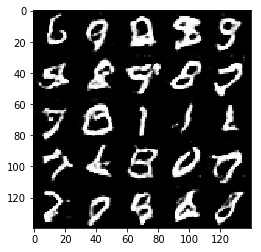

Epoch 3/3... Discriminator Loss: 0.1156... Generator Loss: 3.0900
Epoch 3/3... Discriminator Loss: 0.0887... Generator Loss: 3.4847
Epoch 3/3... Discriminator Loss: 0.1654... Generator Loss: 2.9804
Epoch 3/3... Discriminator Loss: 0.2229... Generator Loss: 2.2271
Epoch 3/3... Discriminator Loss: 0.1683... Generator Loss: 2.4799
Epoch 3/3... Discriminator Loss: 0.1724... Generator Loss: 2.1660
Epoch 3/3... Discriminator Loss: 0.1648... Generator Loss: 2.6564
Epoch 3/3... Discriminator Loss: 0.1646... Generator Loss: 2.4457
Epoch 3/3... Discriminator Loss: 0.1900... Generator Loss: 2.6027
Epoch 3/3... Discriminator Loss: 0.1986... Generator Loss: 3.0247


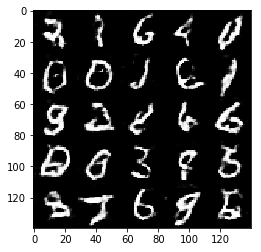

Epoch 3/3... Discriminator Loss: 0.1026... Generator Loss: 3.1992
Epoch 3/3... Discriminator Loss: 0.2507... Generator Loss: 1.8518
Epoch 3/3... Discriminator Loss: 0.0868... Generator Loss: 3.2713
Epoch 3/3... Discriminator Loss: 0.3651... Generator Loss: 4.5812
Epoch 3/3... Discriminator Loss: 0.5255... Generator Loss: 1.3731
Epoch 3/3... Discriminator Loss: 0.1896... Generator Loss: 2.2097
Epoch 3/3... Discriminator Loss: 0.0486... Generator Loss: 3.8124
Epoch 3/3... Discriminator Loss: 0.4258... Generator Loss: 1.6754
Epoch 3/3... Discriminator Loss: 0.2077... Generator Loss: 2.2008
Epoch 3/3... Discriminator Loss: 0.1741... Generator Loss: 2.3451


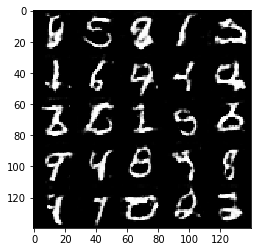

Epoch 3/3... Discriminator Loss: 0.0954... Generator Loss: 3.4608
Epoch 3/3... Discriminator Loss: 0.2231... Generator Loss: 2.7855
Epoch 3/3... Discriminator Loss: 0.3140... Generator Loss: 1.6897
Epoch 3/3... Discriminator Loss: 0.1605... Generator Loss: 2.6160
Epoch 3/3... Discriminator Loss: 0.2089... Generator Loss: 2.0880
Epoch 3/3... Discriminator Loss: 0.1467... Generator Loss: 2.7746
Epoch 3/3... Discriminator Loss: 0.2102... Generator Loss: 2.3647
Epoch 3/3... Discriminator Loss: 0.1303... Generator Loss: 2.7507
Epoch 3/3... Discriminator Loss: 0.0779... Generator Loss: 3.2254
Epoch 3/3... Discriminator Loss: 0.1120... Generator Loss: 2.9973


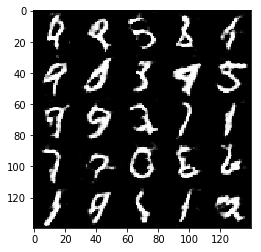

Epoch 3/3... Discriminator Loss: 0.1571... Generator Loss: 2.7946
Epoch 3/3... Discriminator Loss: 0.1174... Generator Loss: 2.4723
Epoch 3/3... Discriminator Loss: 0.2604... Generator Loss: 2.0727
Epoch 3/3... Discriminator Loss: 0.1875... Generator Loss: 2.9602
Epoch 3/3... Discriminator Loss: 0.0579... Generator Loss: 5.1205
Epoch 3/3... Discriminator Loss: 0.1562... Generator Loss: 2.8545
Epoch 3/3... Discriminator Loss: 0.6376... Generator Loss: 0.9603
Epoch 3/3... Discriminator Loss: 0.2168... Generator Loss: 2.4220
Epoch 3/3... Discriminator Loss: 0.1320... Generator Loss: 2.7817
Epoch 3/3... Discriminator Loss: 0.2519... Generator Loss: 2.6195


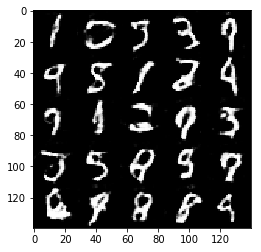

Epoch 3/3... Discriminator Loss: 0.2256... Generator Loss: 2.1631
Epoch 3/3... Discriminator Loss: 0.1141... Generator Loss: 3.0616
Epoch 3/3... Discriminator Loss: 0.2662... Generator Loss: 1.8173
Epoch 3/3... Discriminator Loss: 0.1110... Generator Loss: 2.9028
Epoch 3/3... Discriminator Loss: 0.1106... Generator Loss: 3.1002
Epoch 3/3... Discriminator Loss: 0.0799... Generator Loss: 2.9952
Epoch 3/3... Discriminator Loss: 0.0795... Generator Loss: 3.2496
Epoch 3/3... Discriminator Loss: 0.1089... Generator Loss: 3.2318
Epoch 3/3... Discriminator Loss: 0.1634... Generator Loss: 2.5678
Epoch 3/3... Discriminator Loss: 0.1507... Generator Loss: 2.3764


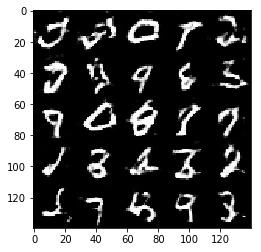

Epoch 3/3... Discriminator Loss: 0.0461... Generator Loss: 3.9284
Epoch 3/3... Discriminator Loss: 0.2956... Generator Loss: 2.1282
Epoch 3/3... Discriminator Loss: 0.8183... Generator Loss: 3.4960
Epoch 3/3... Discriminator Loss: 0.1963... Generator Loss: 2.1333
Epoch 3/3... Discriminator Loss: 0.1147... Generator Loss: 3.0950
Epoch 3/3... Discriminator Loss: 0.2172... Generator Loss: 2.5133
Epoch 3/3... Discriminator Loss: 0.0844... Generator Loss: 5.5558
Epoch 3/3... Discriminator Loss: 0.1652... Generator Loss: 3.0654
Epoch 3/3... Discriminator Loss: 0.1976... Generator Loss: 2.3311
Epoch 3/3... Discriminator Loss: 0.1088... Generator Loss: 3.2017


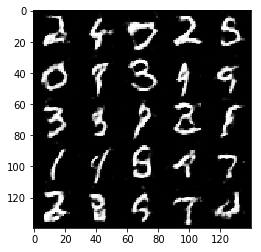

Epoch 3/3... Discriminator Loss: 0.1188... Generator Loss: 2.5344
Epoch 3/3... Discriminator Loss: 0.2150... Generator Loss: 2.1626
Epoch 3/3... Discriminator Loss: 0.2015... Generator Loss: 2.1223
Epoch 3/3... Discriminator Loss: 0.3032... Generator Loss: 1.6579
Epoch 3/3... Discriminator Loss: 0.2243... Generator Loss: 2.2249
Epoch 3/3... Discriminator Loss: 0.1128... Generator Loss: 2.6999
Epoch 3/3... Discriminator Loss: 0.2465... Generator Loss: 2.1566
Epoch 3/3... Discriminator Loss: 0.2379... Generator Loss: 2.0713
Epoch 3/3... Discriminator Loss: 0.1502... Generator Loss: 2.5574
Epoch 3/3... Discriminator Loss: 0.2862... Generator Loss: 1.8375


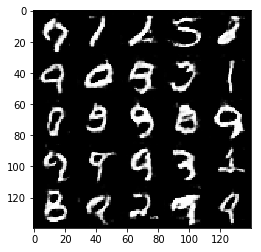

Epoch 3/3... Discriminator Loss: 0.2300... Generator Loss: 2.1191
Epoch 3/3... Discriminator Loss: 0.0761... Generator Loss: 3.6862
Epoch 3/3... Discriminator Loss: 0.2378... Generator Loss: 2.6062
Epoch 3/3... Discriminator Loss: 0.6476... Generator Loss: 1.0895
Epoch 3/3... Discriminator Loss: 0.1637... Generator Loss: 3.5267
Epoch 3/3... Discriminator Loss: 0.4088... Generator Loss: 1.6338
Epoch 3/3... Discriminator Loss: 0.1299... Generator Loss: 3.3371
Epoch 3/3... Discriminator Loss: 0.2377... Generator Loss: 2.0285
Epoch 3/3... Discriminator Loss: 0.1602... Generator Loss: 2.3956
Epoch 3/3... Discriminator Loss: 0.1845... Generator Loss: 2.5567


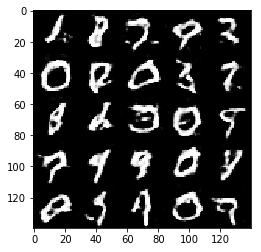

Epoch 3/3... Discriminator Loss: 0.1666... Generator Loss: 2.6560
Epoch 3/3... Discriminator Loss: 1.5371... Generator Loss: 0.3830
Epoch 3/3... Discriminator Loss: 0.0372... Generator Loss: 4.6174
Epoch 3/3... Discriminator Loss: 0.1667... Generator Loss: 2.7417
Epoch 3/3... Discriminator Loss: 0.1312... Generator Loss: 2.4229
Epoch 3/3... Discriminator Loss: 0.0856... Generator Loss: 4.3644
Epoch 3/3... Discriminator Loss: 0.1431... Generator Loss: 2.9049
Epoch 3/3... Discriminator Loss: 0.1788... Generator Loss: 2.4979
Epoch 3/3... Discriminator Loss: 0.1650... Generator Loss: 2.2890
Epoch 3/3... Discriminator Loss: 0.3825... Generator Loss: 1.4917


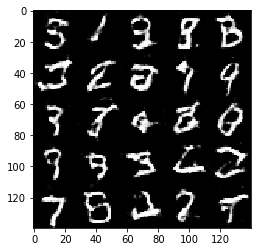

Epoch 3/3... Discriminator Loss: 0.1263... Generator Loss: 3.0187
Epoch 3/3... Discriminator Loss: 0.2213... Generator Loss: 2.9972
Epoch 3/3... Discriminator Loss: 0.6102... Generator Loss: 1.1690
Epoch 3/3... Discriminator Loss: 0.2153... Generator Loss: 2.3031
Epoch 3/3... Discriminator Loss: 0.0848... Generator Loss: 3.4783
Epoch 3/3... Discriminator Loss: 0.1533... Generator Loss: 2.3451
Epoch 3/3... Discriminator Loss: 0.2917... Generator Loss: 1.9164
Epoch 3/3... Discriminator Loss: 0.1395... Generator Loss: 2.4359
Epoch 3/3... Discriminator Loss: 0.1487... Generator Loss: 2.5928
Epoch 3/3... Discriminator Loss: 0.0886... Generator Loss: 3.2583


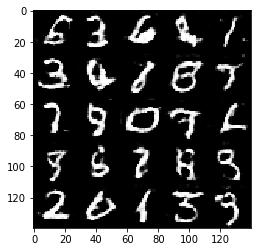

Epoch 3/3... Discriminator Loss: 0.0374... Generator Loss: 4.1831
Epoch 3/3... Discriminator Loss: 0.1024... Generator Loss: 3.0063
Epoch 3/3... Discriminator Loss: 0.0730... Generator Loss: 5.5970
Epoch 3/3... Discriminator Loss: 0.0860... Generator Loss: 3.3001
Epoch 3/3... Discriminator Loss: 0.2428... Generator Loss: 2.1422
Epoch 3/3... Discriminator Loss: 0.3171... Generator Loss: 1.6955
Epoch 3/3... Discriminator Loss: 0.0560... Generator Loss: 3.3506
Epoch 3/3... Discriminator Loss: 0.7348... Generator Loss: 4.0087
Epoch 3/3... Discriminator Loss: 0.0806... Generator Loss: 3.5175
Epoch 3/3... Discriminator Loss: 0.1423... Generator Loss: 2.5774


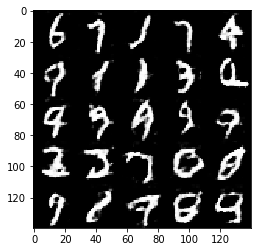

Epoch 3/3... Discriminator Loss: 0.1508... Generator Loss: 2.4628
Epoch 3/3... Discriminator Loss: 0.2656... Generator Loss: 1.9125
Epoch 3/3... Discriminator Loss: 0.1602... Generator Loss: 2.2295
Epoch 3/3... Discriminator Loss: 0.1114... Generator Loss: 2.8107
Epoch 3/3... Discriminator Loss: 0.2450... Generator Loss: 1.9738
Epoch 3/3... Discriminator Loss: 0.1747... Generator Loss: 2.2432
Epoch 3/3... Discriminator Loss: 0.2362... Generator Loss: 1.9331
Epoch 3/3... Discriminator Loss: 0.1265... Generator Loss: 5.7927
Epoch 3/3... Discriminator Loss: 3.0736... Generator Loss: 0.0902
Epoch 3/3... Discriminator Loss: 0.2088... Generator Loss: 2.6422


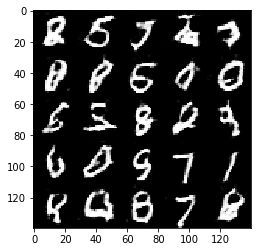

Epoch 3/3... Discriminator Loss: 0.1963... Generator Loss: 2.9142
Epoch 3/3... Discriminator Loss: 0.3728... Generator Loss: 1.6275
Epoch 3/3... Discriminator Loss: 0.1256... Generator Loss: 2.9208
Epoch 3/3... Discriminator Loss: 0.1922... Generator Loss: 2.4977
Epoch 3/3... Discriminator Loss: 0.3549... Generator Loss: 1.6139
Epoch 3/3... Discriminator Loss: 0.1465... Generator Loss: 2.4712
Epoch 3/3... Discriminator Loss: 0.1256... Generator Loss: 2.7058
Epoch 3/3... Discriminator Loss: 0.1745... Generator Loss: 2.3664
Epoch 3/3... Discriminator Loss: 0.0654... Generator Loss: 4.5199
Epoch 3/3... Discriminator Loss: 0.2828... Generator Loss: 2.2566


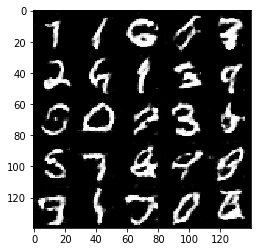

Epoch 3/3... Discriminator Loss: 0.1707... Generator Loss: 2.8373
Epoch 3/3... Discriminator Loss: 0.2052... Generator Loss: 2.1245
Epoch 3/3... Discriminator Loss: 0.1609... Generator Loss: 2.7618
Epoch 3/3... Discriminator Loss: 0.1985... Generator Loss: 2.3470
Epoch 3/3... Discriminator Loss: 0.2319... Generator Loss: 2.1585
Epoch 3/3... Discriminator Loss: 0.1887... Generator Loss: 2.1873
Epoch 3/3... Discriminator Loss: 0.3272... Generator Loss: 2.1904
Epoch 3/3... Discriminator Loss: 0.2666... Generator Loss: 1.9124
Epoch 3/3... Discriminator Loss: 0.2853... Generator Loss: 1.7520
Epoch 3/3... Discriminator Loss: 0.1178... Generator Loss: 2.8091


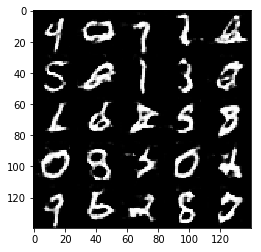

Epoch 3/3... Discriminator Loss: 0.1916... Generator Loss: 2.2833
Epoch 3/3... Discriminator Loss: 0.1668... Generator Loss: 2.6464
Epoch 3/3... Discriminator Loss: 0.0708... Generator Loss: 3.3942
Epoch 3/3... Discriminator Loss: 0.3306... Generator Loss: 1.8690
Epoch 3/3... Discriminator Loss: 0.2776... Generator Loss: 2.0269
Epoch 3/3... Discriminator Loss: 0.1152... Generator Loss: 3.3841
Epoch 3/3... Discriminator Loss: 0.0888... Generator Loss: 2.8124
Epoch 3/3... Discriminator Loss: 0.0870... Generator Loss: 5.2488
Epoch 3/3... Discriminator Loss: 0.0885... Generator Loss: 3.3905
Epoch 3/3... Discriminator Loss: 0.1266... Generator Loss: 2.6491


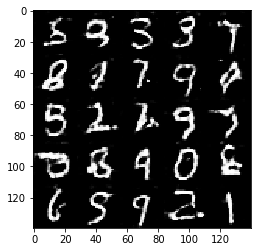

Epoch 3/3... Discriminator Loss: 0.1193... Generator Loss: 2.6930
Epoch 3/3... Discriminator Loss: 0.1913... Generator Loss: 2.4968
Epoch 3/3... Discriminator Loss: 0.1784... Generator Loss: 2.2426
Epoch 3/3... Discriminator Loss: 0.2022... Generator Loss: 2.3625
Epoch 3/3... Discriminator Loss: 0.0987... Generator Loss: 3.1009
Epoch 3/3... Discriminator Loss: 0.4318... Generator Loss: 1.5016
Epoch 3/3... Discriminator Loss: 0.0291... Generator Loss: 5.2753
Epoch 3/3... Discriminator Loss: 0.3599... Generator Loss: 1.8488
Epoch 3/3... Discriminator Loss: 0.7024... Generator Loss: 3.2123
Epoch 3/3... Discriminator Loss: 0.1584... Generator Loss: 2.8223


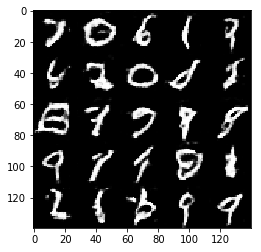

Epoch 3/3... Discriminator Loss: 0.0331... Generator Loss: 5.4747
Epoch 3/3... Discriminator Loss: 0.1140... Generator Loss: 2.5333
Epoch 3/3... Discriminator Loss: 0.1712... Generator Loss: 2.3778
Epoch 3/3... Discriminator Loss: 0.3934... Generator Loss: 1.4325
Epoch 3/3... Discriminator Loss: 0.0936... Generator Loss: 3.1512
Epoch 3/3... Discriminator Loss: 0.1401... Generator Loss: 3.8772
Epoch 3/3... Discriminator Loss: 0.0616... Generator Loss: 4.7554
Epoch 3/3... Discriminator Loss: 0.2630... Generator Loss: 2.3151
Epoch 3/3... Discriminator Loss: 0.8632... Generator Loss: 0.8115
Epoch 3/3... Discriminator Loss: 0.1065... Generator Loss: 2.8994


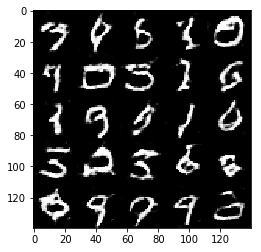

Epoch 3/3... Discriminator Loss: 0.2636... Generator Loss: 1.9406
Epoch 3/3... Discriminator Loss: 0.0808... Generator Loss: 3.3700
Epoch 3/3... Discriminator Loss: 0.4130... Generator Loss: 1.5766
Epoch 3/3... Discriminator Loss: 0.2043... Generator Loss: 2.4622
Epoch 3/3... Discriminator Loss: 0.1502... Generator Loss: 4.2845
Epoch 3/3... Discriminator Loss: 0.1076... Generator Loss: 2.8790
Epoch 3/3... Discriminator Loss: 0.1196... Generator Loss: 3.1913
Epoch 3/3... Discriminator Loss: 0.0621... Generator Loss: 3.6125
Epoch 3/3... Discriminator Loss: 0.0927... Generator Loss: 3.2962
Epoch 3/3... Discriminator Loss: 0.1875... Generator Loss: 2.5326


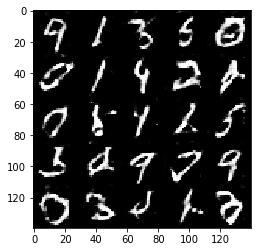

Epoch 3/3... Discriminator Loss: 0.2062... Generator Loss: 2.5380
Epoch 3/3... Discriminator Loss: 0.2231... Generator Loss: 2.3822
Epoch 3/3... Discriminator Loss: 0.1968... Generator Loss: 2.2893
Epoch 3/3... Discriminator Loss: 0.0783... Generator Loss: 3.1925
Epoch 3/3... Discriminator Loss: 0.1471... Generator Loss: 2.7786


In [ ]:
batch_size = 16
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3 #modified for better results

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/3... Discriminator Loss: 0.4367... Generator Loss: 1.3516
Epoch 1/3... Discriminator Loss: 0.3090... Generator Loss: 1.8916
Epoch 1/3... Discriminator Loss: 0.2481... Generator Loss: 2.0241
Epoch 1/3... Discriminator Loss: 0.1545... Generator Loss: 2.4877
Epoch 1/3... Discriminator Loss: 0.0992... Generator Loss: 2.8874
Epoch 1/3... Discriminator Loss: 0.1810... Generator Loss: 2.5019
Epoch 1/3... Discriminator Loss: 0.1654... Generator Loss: 2.5946
Epoch 1/3... Discriminator Loss: 0.1568... Generator Loss: 2.7355
Epoch 1/3... Discriminator Loss: 0.1055... Generator Loss: 2.7331
Epoch 1/3... Discriminator Loss: 0.0862... Generator Loss: 3.0746


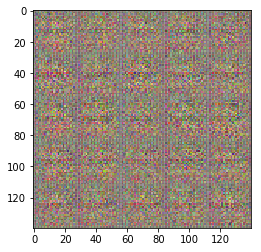

Epoch 1/3... Discriminator Loss: 0.0808... Generator Loss: 3.0351
Epoch 1/3... Discriminator Loss: 0.1152... Generator Loss: 3.0783
Epoch 1/3... Discriminator Loss: 0.0919... Generator Loss: 3.1658
Epoch 1/3... Discriminator Loss: 0.0795... Generator Loss: 3.0184
Epoch 1/3... Discriminator Loss: 0.0572... Generator Loss: 3.4884
Epoch 1/3... Discriminator Loss: 0.0712... Generator Loss: 3.5261
Epoch 1/3... Discriminator Loss: 0.0497... Generator Loss: 3.4312
Epoch 1/3... Discriminator Loss: 0.0489... Generator Loss: 3.6856
Epoch 1/3... Discriminator Loss: 0.0348... Generator Loss: 3.7620
Epoch 1/3... Discriminator Loss: 0.0207... Generator Loss: 4.4408


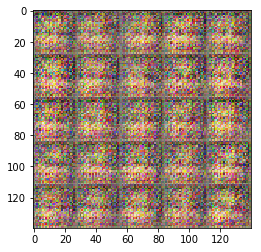

Epoch 1/3... Discriminator Loss: 0.0433... Generator Loss: 3.9742
Epoch 1/3... Discriminator Loss: 0.0535... Generator Loss: 3.7686
Epoch 1/3... Discriminator Loss: 0.0294... Generator Loss: 4.1209
Epoch 1/3... Discriminator Loss: 0.0269... Generator Loss: 4.0570
Epoch 1/3... Discriminator Loss: 0.0383... Generator Loss: 4.5183
Epoch 1/3... Discriminator Loss: 0.0919... Generator Loss: 3.2135
Epoch 1/3... Discriminator Loss: 0.0398... Generator Loss: 3.7781
Epoch 1/3... Discriminator Loss: 0.0160... Generator Loss: 5.5113
Epoch 1/3... Discriminator Loss: 0.0282... Generator Loss: 5.2597
Epoch 1/3... Discriminator Loss: 0.0948... Generator Loss: 6.0582


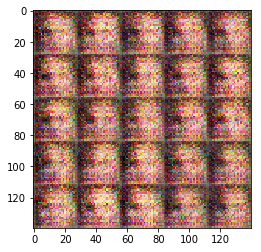

Epoch 1/3... Discriminator Loss: 0.0316... Generator Loss: 4.0199
Epoch 1/3... Discriminator Loss: 0.0386... Generator Loss: 4.0924
Epoch 1/3... Discriminator Loss: 0.0240... Generator Loss: 4.0972
Epoch 1/3... Discriminator Loss: 0.0625... Generator Loss: 3.6536
Epoch 1/3... Discriminator Loss: 0.0509... Generator Loss: 4.1592
Epoch 1/3... Discriminator Loss: 0.0161... Generator Loss: 4.9766
Epoch 1/3... Discriminator Loss: 0.0634... Generator Loss: 3.6454
Epoch 1/3... Discriminator Loss: 0.0357... Generator Loss: 4.2560
Epoch 1/3... Discriminator Loss: 0.0329... Generator Loss: 4.1658
Epoch 1/3... Discriminator Loss: 0.0453... Generator Loss: 5.3385


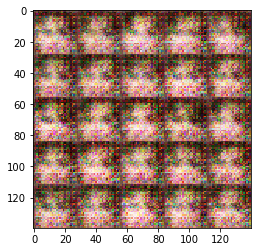

Epoch 1/3... Discriminator Loss: 0.0474... Generator Loss: 4.2239
Epoch 1/3... Discriminator Loss: 0.0145... Generator Loss: 9.3510
Epoch 1/3... Discriminator Loss: 0.0627... Generator Loss: 4.1725
Epoch 1/3... Discriminator Loss: 0.0410... Generator Loss: 3.7425
Epoch 1/3... Discriminator Loss: 0.1014... Generator Loss: 3.0515
Epoch 1/3... Discriminator Loss: 0.0493... Generator Loss: 3.7371
Epoch 1/3... Discriminator Loss: 0.0361... Generator Loss: 3.8559
Epoch 1/3... Discriminator Loss: 0.1450... Generator Loss: 2.3882
Epoch 1/3... Discriminator Loss: 0.0873... Generator Loss: 4.3402
Epoch 1/3... Discriminator Loss: 0.0472... Generator Loss: 4.1277


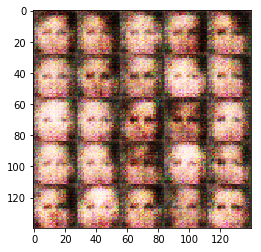

Epoch 1/3... Discriminator Loss: 0.0698... Generator Loss: 3.5060
Epoch 1/3... Discriminator Loss: 0.0829... Generator Loss: 3.1670
Epoch 1/3... Discriminator Loss: 0.1940... Generator Loss: 2.1655
Epoch 1/3... Discriminator Loss: 0.1052... Generator Loss: 4.2911
Epoch 1/3... Discriminator Loss: 0.0757... Generator Loss: 3.6265
Epoch 1/3... Discriminator Loss: 0.0622... Generator Loss: 3.3355
Epoch 1/3... Discriminator Loss: 0.0522... Generator Loss: 3.9880
Epoch 1/3... Discriminator Loss: 0.0895... Generator Loss: 3.0949
Epoch 1/3... Discriminator Loss: 0.1312... Generator Loss: 5.4273
Epoch 1/3... Discriminator Loss: 0.1288... Generator Loss: 2.7298


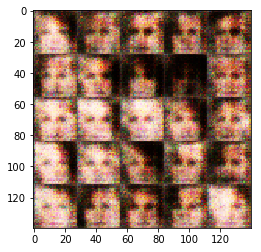

Epoch 1/3... Discriminator Loss: 0.1220... Generator Loss: 2.8438
Epoch 1/3... Discriminator Loss: 0.1265... Generator Loss: 3.3460
Epoch 1/3... Discriminator Loss: 0.0984... Generator Loss: 3.0265
Epoch 1/3... Discriminator Loss: 0.0573... Generator Loss: 4.3427
Epoch 1/3... Discriminator Loss: 0.1315... Generator Loss: 3.2633
Epoch 1/3... Discriminator Loss: 0.1377... Generator Loss: 2.9423
Epoch 1/3... Discriminator Loss: 0.0627... Generator Loss: 3.9447
Epoch 1/3... Discriminator Loss: 0.1052... Generator Loss: 3.3508
Epoch 1/3... Discriminator Loss: 0.0706... Generator Loss: 3.5274
Epoch 1/3... Discriminator Loss: 0.1356... Generator Loss: 2.9278


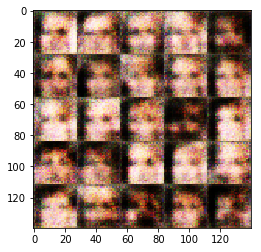

Epoch 1/3... Discriminator Loss: 0.1306... Generator Loss: 3.1778
Epoch 1/3... Discriminator Loss: 0.0812... Generator Loss: 3.3414
Epoch 1/3... Discriminator Loss: 0.0546... Generator Loss: 4.0505
Epoch 1/3... Discriminator Loss: 1.3354... Generator Loss: 0.4145
Epoch 1/3... Discriminator Loss: 0.5017... Generator Loss: 1.5668
Epoch 1/3... Discriminator Loss: 0.1462... Generator Loss: 2.6252
Epoch 1/3... Discriminator Loss: 0.1550... Generator Loss: 2.8894
Epoch 1/3... Discriminator Loss: 0.1751... Generator Loss: 3.3812
Epoch 1/3... Discriminator Loss: 0.1073... Generator Loss: 3.7010
Epoch 1/3... Discriminator Loss: 0.0861... Generator Loss: 3.7787


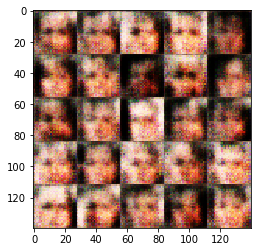

Epoch 1/3... Discriminator Loss: 0.0646... Generator Loss: 3.6661
Epoch 1/3... Discriminator Loss: 0.2311... Generator Loss: 1.7477
Epoch 1/3... Discriminator Loss: 0.0994... Generator Loss: 3.6376
Epoch 1/3... Discriminator Loss: 0.0717... Generator Loss: 4.1526
Epoch 1/3... Discriminator Loss: 0.1050... Generator Loss: 4.2194
Epoch 1/3... Discriminator Loss: 0.1738... Generator Loss: 2.2489
Epoch 1/3... Discriminator Loss: 0.1499... Generator Loss: 2.6464
Epoch 1/3... Discriminator Loss: 0.1003... Generator Loss: 3.9232
Epoch 1/3... Discriminator Loss: 0.0742... Generator Loss: 3.4247
Epoch 1/3... Discriminator Loss: 0.0774... Generator Loss: 4.3338


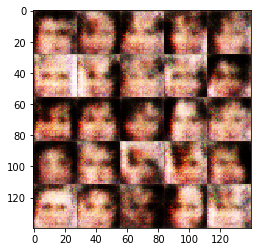

Epoch 1/3... Discriminator Loss: 0.2486... Generator Loss: 2.3186
Epoch 1/3... Discriminator Loss: 0.1474... Generator Loss: 3.6544
Epoch 1/3... Discriminator Loss: 0.1672... Generator Loss: 2.2593
Epoch 1/3... Discriminator Loss: 0.1233... Generator Loss: 2.7999
Epoch 1/3... Discriminator Loss: 0.0972... Generator Loss: 4.3249
Epoch 1/3... Discriminator Loss: 0.0609... Generator Loss: 3.9764
Epoch 1/3... Discriminator Loss: 0.0291... Generator Loss: 4.5127
Epoch 1/3... Discriminator Loss: 0.2827... Generator Loss: 2.1529
Epoch 1/3... Discriminator Loss: 0.1621... Generator Loss: 3.1949
Epoch 1/3... Discriminator Loss: 0.1359... Generator Loss: 2.9172


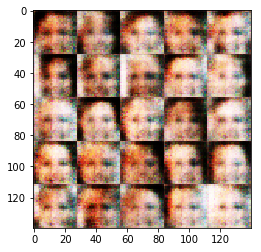

Epoch 1/3... Discriminator Loss: 0.1232... Generator Loss: 3.6574
Epoch 1/3... Discriminator Loss: 0.2617... Generator Loss: 2.4671
Epoch 1/3... Discriminator Loss: 0.1463... Generator Loss: 2.7256
Epoch 1/3... Discriminator Loss: 0.0926... Generator Loss: 3.5030
Epoch 1/3... Discriminator Loss: 0.3060... Generator Loss: 2.2660
Epoch 1/3... Discriminator Loss: 0.1271... Generator Loss: 2.6225
Epoch 1/3... Discriminator Loss: 0.1911... Generator Loss: 2.5133
Epoch 1/3... Discriminator Loss: 0.5019... Generator Loss: 1.2199
Epoch 1/3... Discriminator Loss: 0.2753... Generator Loss: 4.3611
Epoch 1/3... Discriminator Loss: 0.1056... Generator Loss: 2.6374


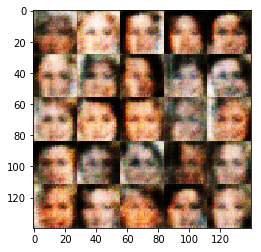

Epoch 1/3... Discriminator Loss: 0.1651... Generator Loss: 3.5248
Epoch 1/3... Discriminator Loss: 0.6561... Generator Loss: 1.0044
Epoch 1/3... Discriminator Loss: 0.2243... Generator Loss: 2.5305
Epoch 1/3... Discriminator Loss: 0.5323... Generator Loss: 1.2664
Epoch 1/3... Discriminator Loss: 0.1188... Generator Loss: 2.8731
Epoch 1/3... Discriminator Loss: 0.1137... Generator Loss: 3.9223
Epoch 1/3... Discriminator Loss: 0.1242... Generator Loss: 3.9300
Epoch 1/3... Discriminator Loss: 0.2850... Generator Loss: 2.0686
Epoch 1/3... Discriminator Loss: 0.3035... Generator Loss: 1.8359
Epoch 1/3... Discriminator Loss: 0.1451... Generator Loss: 3.3394


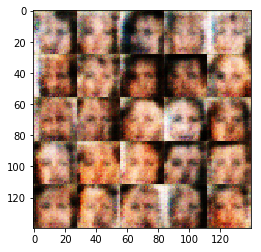

Epoch 1/3... Discriminator Loss: 0.1078... Generator Loss: 3.1553
Epoch 1/3... Discriminator Loss: 0.1853... Generator Loss: 2.3856
Epoch 1/3... Discriminator Loss: 0.0780... Generator Loss: 3.4542
Epoch 1/3... Discriminator Loss: 0.1133... Generator Loss: 3.1483
Epoch 1/3... Discriminator Loss: 0.2862... Generator Loss: 2.8431
Epoch 1/3... Discriminator Loss: 0.2174... Generator Loss: 2.4264
Epoch 1/3... Discriminator Loss: 0.2895... Generator Loss: 2.5511
Epoch 1/3... Discriminator Loss: 0.2207... Generator Loss: 2.1269
Epoch 1/3... Discriminator Loss: 0.3845... Generator Loss: 1.4188
Epoch 1/3... Discriminator Loss: 0.0815... Generator Loss: 3.4819


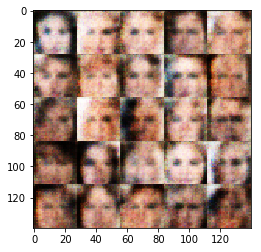

Epoch 1/3... Discriminator Loss: 1.0342... Generator Loss: 0.7245
Epoch 1/3... Discriminator Loss: 0.1321... Generator Loss: 2.8373
Epoch 1/3... Discriminator Loss: 0.2779... Generator Loss: 1.9373
Epoch 1/3... Discriminator Loss: 0.1944... Generator Loss: 2.4570
Epoch 1/3... Discriminator Loss: 0.1846... Generator Loss: 2.7882
Epoch 1/3... Discriminator Loss: 0.1762... Generator Loss: 2.5561
Epoch 1/3... Discriminator Loss: 0.2323... Generator Loss: 2.2435
Epoch 1/3... Discriminator Loss: 0.1703... Generator Loss: 2.9642
Epoch 1/3... Discriminator Loss: 0.3252... Generator Loss: 2.0074
Epoch 1/3... Discriminator Loss: 0.1553... Generator Loss: 3.7040


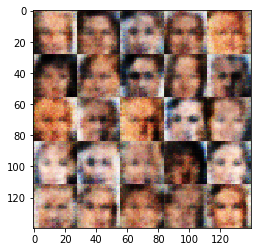

Epoch 1/3... Discriminator Loss: 0.2454... Generator Loss: 2.5604
Epoch 1/3... Discriminator Loss: 0.2255... Generator Loss: 2.3333
Epoch 1/3... Discriminator Loss: 0.2985... Generator Loss: 3.3791
Epoch 1/3... Discriminator Loss: 0.1438... Generator Loss: 2.9876
Epoch 1/3... Discriminator Loss: 0.3279... Generator Loss: 1.7693
Epoch 1/3... Discriminator Loss: 0.1564... Generator Loss: 2.3794
Epoch 1/3... Discriminator Loss: 0.2373... Generator Loss: 2.8469
Epoch 1/3... Discriminator Loss: 0.1504... Generator Loss: 3.2412
Epoch 1/3... Discriminator Loss: 0.1424... Generator Loss: 2.4667
Epoch 1/3... Discriminator Loss: 0.2428... Generator Loss: 2.2945


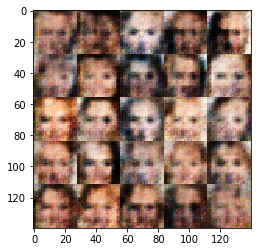

Epoch 1/3... Discriminator Loss: 0.3571... Generator Loss: 2.0442
Epoch 1/3... Discriminator Loss: 0.3847... Generator Loss: 1.6091
Epoch 1/3... Discriminator Loss: 0.4162... Generator Loss: 1.8449
Epoch 1/3... Discriminator Loss: 0.2170... Generator Loss: 2.9569
Epoch 1/3... Discriminator Loss: 0.1707... Generator Loss: 2.6241
Epoch 1/3... Discriminator Loss: 0.2278... Generator Loss: 2.7257
Epoch 1/3... Discriminator Loss: 0.4517... Generator Loss: 3.3149
Epoch 1/3... Discriminator Loss: 0.1726... Generator Loss: 3.6689
Epoch 1/3... Discriminator Loss: 0.0920... Generator Loss: 3.0170
Epoch 1/3... Discriminator Loss: 0.2904... Generator Loss: 2.4038


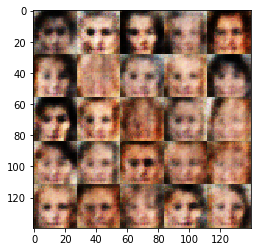

Epoch 1/3... Discriminator Loss: 1.4377... Generator Loss: 0.3679
Epoch 1/3... Discriminator Loss: 0.4597... Generator Loss: 1.3277
Epoch 1/3... Discriminator Loss: 0.2788... Generator Loss: 2.4143
Epoch 1/3... Discriminator Loss: 0.3241... Generator Loss: 1.9699
Epoch 1/3... Discriminator Loss: 0.2674... Generator Loss: 2.1082
Epoch 1/3... Discriminator Loss: 0.3710... Generator Loss: 1.6795
Epoch 1/3... Discriminator Loss: 0.3348... Generator Loss: 2.2777
Epoch 1/3... Discriminator Loss: 0.2805... Generator Loss: 2.3081
Epoch 1/3... Discriminator Loss: 0.3030... Generator Loss: 2.7059
Epoch 1/3... Discriminator Loss: 0.1404... Generator Loss: 2.9580


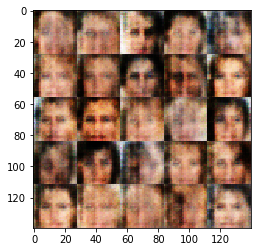

Epoch 1/3... Discriminator Loss: 0.1716... Generator Loss: 3.4597
Epoch 1/3... Discriminator Loss: 0.5255... Generator Loss: 1.9482
Epoch 1/3... Discriminator Loss: 0.6562... Generator Loss: 1.0877
Epoch 1/3... Discriminator Loss: 0.1928... Generator Loss: 2.5809
Epoch 1/3... Discriminator Loss: 0.4019... Generator Loss: 1.9877
Epoch 1/3... Discriminator Loss: 0.3099... Generator Loss: 1.7299
Epoch 1/3... Discriminator Loss: 0.2289... Generator Loss: 3.1231
Epoch 1/3... Discriminator Loss: 0.1926... Generator Loss: 2.3920
Epoch 1/3... Discriminator Loss: 0.3248... Generator Loss: 2.0831
Epoch 1/3... Discriminator Loss: 0.2793... Generator Loss: 2.0746


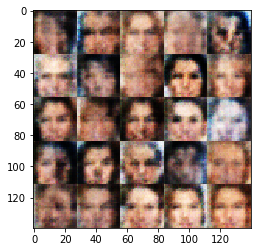

Epoch 1/3... Discriminator Loss: 0.2445... Generator Loss: 2.6082
Epoch 1/3... Discriminator Loss: 0.2297... Generator Loss: 2.4854
Epoch 1/3... Discriminator Loss: 0.4249... Generator Loss: 1.7790
Epoch 1/3... Discriminator Loss: 0.3763... Generator Loss: 1.9120
Epoch 1/3... Discriminator Loss: 0.3272... Generator Loss: 2.5430
Epoch 1/3... Discriminator Loss: 0.2214... Generator Loss: 2.5764
Epoch 1/3... Discriminator Loss: 0.3710... Generator Loss: 2.2594
Epoch 1/3... Discriminator Loss: 0.5758... Generator Loss: 1.3349
Epoch 1/3... Discriminator Loss: 0.2575... Generator Loss: 2.4461
Epoch 1/3... Discriminator Loss: 0.2646... Generator Loss: 2.9649


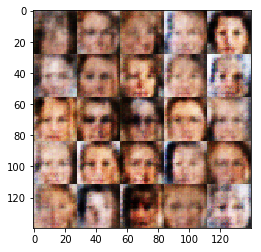

Epoch 1/3... Discriminator Loss: 0.6481... Generator Loss: 1.0809
Epoch 1/3... Discriminator Loss: 0.5576... Generator Loss: 1.4483
Epoch 1/3... Discriminator Loss: 0.5514... Generator Loss: 1.3626
Epoch 1/3... Discriminator Loss: 0.2855... Generator Loss: 2.2322
Epoch 1/3... Discriminator Loss: 0.5517... Generator Loss: 1.2997
Epoch 1/3... Discriminator Loss: 0.4166... Generator Loss: 1.7690
Epoch 1/3... Discriminator Loss: 0.3536... Generator Loss: 1.6546
Epoch 1/3... Discriminator Loss: 0.2809... Generator Loss: 1.8304
Epoch 1/3... Discriminator Loss: 0.5407... Generator Loss: 2.4527
Epoch 1/3... Discriminator Loss: 0.2783... Generator Loss: 2.2741


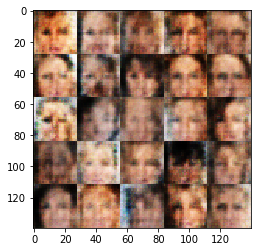

Epoch 1/3... Discriminator Loss: 0.5519... Generator Loss: 2.0118
Epoch 1/3... Discriminator Loss: 0.4618... Generator Loss: 1.9146
Epoch 1/3... Discriminator Loss: 0.5025... Generator Loss: 1.4954
Epoch 1/3... Discriminator Loss: 0.4017... Generator Loss: 2.0472
Epoch 1/3... Discriminator Loss: 0.2995... Generator Loss: 2.3674
Epoch 1/3... Discriminator Loss: 0.4073... Generator Loss: 1.7136
Epoch 1/3... Discriminator Loss: 0.4505... Generator Loss: 1.5959
Epoch 1/3... Discriminator Loss: 0.4095... Generator Loss: 2.3459
Epoch 1/3... Discriminator Loss: 0.4090... Generator Loss: 1.4958
Epoch 1/3... Discriminator Loss: 0.4686... Generator Loss: 1.9889


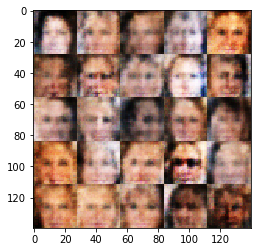

Epoch 1/3... Discriminator Loss: 0.5096... Generator Loss: 1.6286
Epoch 1/3... Discriminator Loss: 0.4198... Generator Loss: 1.4127
Epoch 1/3... Discriminator Loss: 0.4465... Generator Loss: 2.3551
Epoch 1/3... Discriminator Loss: 0.4067... Generator Loss: 1.7369
Epoch 1/3... Discriminator Loss: 0.3870... Generator Loss: 2.0512
Epoch 1/3... Discriminator Loss: 0.3730... Generator Loss: 1.7107
Epoch 1/3... Discriminator Loss: 0.5140... Generator Loss: 1.5885
Epoch 1/3... Discriminator Loss: 0.3519... Generator Loss: 1.7550
Epoch 1/3... Discriminator Loss: 0.3319... Generator Loss: 2.3010
Epoch 1/3... Discriminator Loss: 0.4929... Generator Loss: 1.5151


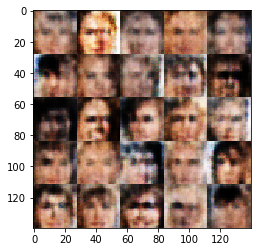

Epoch 1/3... Discriminator Loss: 0.4100... Generator Loss: 2.6479
Epoch 1/3... Discriminator Loss: 0.5158... Generator Loss: 1.3055
Epoch 1/3... Discriminator Loss: 0.5479... Generator Loss: 2.3262
Epoch 1/3... Discriminator Loss: 0.3264... Generator Loss: 1.9369
Epoch 1/3... Discriminator Loss: 0.4153... Generator Loss: 1.7252
Epoch 1/3... Discriminator Loss: 0.3971... Generator Loss: 2.1214
Epoch 1/3... Discriminator Loss: 0.2922... Generator Loss: 1.9228
Epoch 1/3... Discriminator Loss: 0.3237... Generator Loss: 1.9975
Epoch 1/3... Discriminator Loss: 0.3625... Generator Loss: 2.3738
Epoch 1/3... Discriminator Loss: 0.5095... Generator Loss: 1.9016


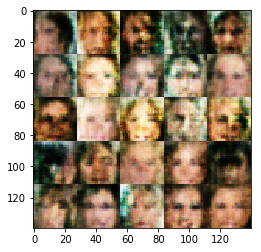

Epoch 1/3... Discriminator Loss: 0.4683... Generator Loss: 1.6176
Epoch 1/3... Discriminator Loss: 0.3257... Generator Loss: 2.3293
Epoch 1/3... Discriminator Loss: 0.4828... Generator Loss: 1.3863
Epoch 1/3... Discriminator Loss: 0.2793... Generator Loss: 2.4169
Epoch 1/3... Discriminator Loss: 0.3086... Generator Loss: 1.7650
Epoch 1/3... Discriminator Loss: 0.8321... Generator Loss: 0.8273
Epoch 1/3... Discriminator Loss: 0.4085... Generator Loss: 2.0678
Epoch 1/3... Discriminator Loss: 0.5180... Generator Loss: 1.3655
Epoch 1/3... Discriminator Loss: 0.3010... Generator Loss: 2.0758
Epoch 1/3... Discriminator Loss: 0.6139... Generator Loss: 1.3166


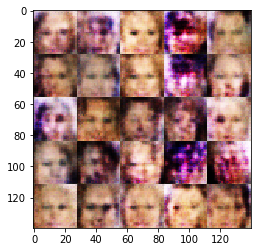

Epoch 1/3... Discriminator Loss: 0.7684... Generator Loss: 1.2938
Epoch 1/3... Discriminator Loss: 0.3705... Generator Loss: 2.2327
Epoch 1/3... Discriminator Loss: 0.6084... Generator Loss: 1.3743
Epoch 1/3... Discriminator Loss: 0.5049... Generator Loss: 1.6578
Epoch 1/3... Discriminator Loss: 0.2965... Generator Loss: 2.0223
Epoch 1/3... Discriminator Loss: 0.4566... Generator Loss: 2.2787
Epoch 1/3... Discriminator Loss: 0.6503... Generator Loss: 2.7531
Epoch 1/3... Discriminator Loss: 0.4391... Generator Loss: 1.8703
Epoch 1/3... Discriminator Loss: 0.6083... Generator Loss: 1.4586
Epoch 1/3... Discriminator Loss: 0.4428... Generator Loss: 1.9432


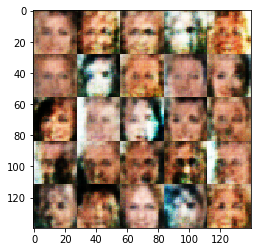

Epoch 1/3... Discriminator Loss: 0.4512... Generator Loss: 2.2540
Epoch 1/3... Discriminator Loss: 0.4021... Generator Loss: 1.9367
Epoch 1/3... Discriminator Loss: 0.4158... Generator Loss: 1.8151
Epoch 1/3... Discriminator Loss: 0.2614... Generator Loss: 2.5287
Epoch 1/3... Discriminator Loss: 0.7167... Generator Loss: 1.0082


In [ ]:
batch_size = 16
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3 #modified for better results

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.